### Geographical Original of Music Data Set

*Download:* [Data Folder](http://archive.ics.uci.edu/ml/machine-learning-databases/00315/), [Data Set Description](http://archive.ics.uci.edu/ml/datasets/geographical+original+of+music#)

**Abstract:** Instances in this dataset contain audio features extracted from 1059 wave files. The task associated with the data is to predict the geographical origin of music.

table for the dataset is shown below:

|                                |                            |                           |      |                         |            |
| :----------------------------- | :------------------------- | :------------------------ | :--- | :---------------------- | :--------- |
| **Data Set Characteristics:**  | Multivariate               | **Number of Instances:**  | 1059 | **Area:**               | N/A        |
| **Attribute Characteristics:** | Real                       | **Number of Attributes:** | 68   | **Date Donated**        | 2014-10-18 |
| **Associated Tasks:**          | Classification, Regression | **Missing Values?**       | N/A  | **Number of Web Hits:** | 110415     |

#### Source:

Creators:

Fang Zhou (fang.zhou '@' nottingham.edu.cn)

The University of Nottinghan, Ningbo, China

Donors of the Dataset:

Fang Zhou (fang.zhou '@' nottingham.edu.cn)

Claire Q (eskoala '@' gmail.com)

Ross D. King (ross.king '@' manchester.ac.uk)

#### Data Set Information:

The dataset was built from a personal collection of 1059 tracks covering 33 countries/area. The music used is traditional, ethnic or `world' only, as classified by the publishers of the product on which it appears. Any Western music is not included because its influence is global - what we seek are the aspects of music that most influence location. Thus, being able to specify a location with strong influence on the music is central.

The geographical location of origin was manually collected the information from the CD sleeve notes, and when this information was inadequate we searched other information sources. The location data is limited in precision to the country of origin.

The country of origin was determined by the artist's or artists' main country/area of residence. Any track that had ambiguous origin is not included. We have taken the position of each country's capital city (or the province of the area) by latitude and longitude as the absolute point of origin.

The program MARSYAS[1] was used to extract audio features from the wave files. We used the default MARSYAS settings in single vector format (68 features) to estimate the performance with basic timbal information covering the entire length of each track. No feature weighting or pre-filtering was applied. All features were transformed to have a mean of 0, and a standard deviation of 1. We also investigated the utility of adding chromatic attributes. These describe the notes of the scale being used. This is especially important as a distinguishing feature in geographical ethnomusicology. The chromatic features provided by MARSYAS are 12 per octave - Western tuning, but it may be possible to tell something from how similar to or different from Western tuning the music is.

[1] G. Tzanetakis and P. Cook, â€œMARSYAS: a framework for audio analysis,â€ Organised Sound, vol. 4, pp. 169â€“175, 2000.

#### Attribute Information:

The dataset is present in two files, where each file corresponds to a different feature sets.

Both files contain the audio features of 1059 tracks.

In the `default_features_1059_tracks.txt` file, the first 68 columns are audio features of the track, and the last two columns are the origin of the music, represented by latitude and longitude.

In the `default_plus_chromatic_features_1059_tracks.txt` file, the first 116 columns are audio features of the track, and the last two columns are the origin of the music.

#### Relevant Papers:

The description of music collection and audio features can be found in:

Fang Zhou, Claire Q and Ross. D. King
Predicting the Geographical Origin of Music, ICDM, 2014

#### Citation Request:

The following citation is requested if you use the dataset:

Fang Zhou, Claire Q and Ross. D. King
Predicting the Geographical Origin of Music, ICDM, 2014


### Veri Madenciliği ve Bilgi Keşfi 2.Vize yerine geçen Ödev Çalışması

Ders kapsamında her öğrenciye ayrı ayrı çalışabileceği bir veriseti verilmiştir. Proje kapsamında aşağıda tanımlı işlemlerin gerçekleştirilmesi beklenmektedir. Verisetleri ile ilgili bilgiyi http://archive.ics.uci.edu/ml/ adresinde bulabilirsiniz. Çalışmanın Jupyter Notebbok ile hazırlanması ve raporun da bu şablonun içinde yazılması gerekmektedir. Ayrıca rapor hazırlamanıza gerek yoktur.

a- Veri Analizi: Veri setinin içeriği, kullanılan özelliklerin anlamı, sınıf sayısı ve isimleri, her sınıfa düşen örnek sayısı gibi bilgilerin çıkarılması gerekir. Veriseti içindeki özelliklerin sınıflamada ki ayırt ediciliklerine göre sıralanması ve eksik veri varsa giderilmesi yöntemlerinin araştırılması beklenmektedir. Ayrıca Aykırı Değer analizinin de yapılması gerekmektedir.

b-Sınıflama: Sınıflama yöntemlerinden en başarılı olanların araştırılması ve 3 tanesinin seçilerek detaylı incelenmesi, sınıflama başarımlarının ve sınıf karışıklık matrislerinin karşılaştırılması gerekmektedir.

c-Kümeleme: Kümeleme yöntemlerinden en başarılı olanların araştırılması ve 3 tanesinin seçilerek detaylı incelenmesi beklenmektedir. Kümeleme sonunda değerlendirme aşamasında örneklerin sınıf etiketlerinin kullanılarak çıkan kümelerin etiketlenmesi ve kümeleme başarılarının karşılaştırılması gerekmektedir.

Değerlendirme:

Proje kapsamında yapılan çalışmalar Jupyter Notebook platformunda (kod ve rapor bir arada) hazırlanarak **19 Aralık 23:59**’a kadar teslim edilmelidir.


# Veri Analizi

#### Veri Setinin İçeriği:

Veri seti, 33 ülkeyi/bölgeyi kapsayan 1059 parçadan oluşan kişisel bir muzik koleksiyonundan oluşturulmuştur. Etkisi küresel olduğu için herhangi bir batı müziği dahil edilmemiştir - aranan şey; müziğin konumu en çok etkileyen yönleridir. Müzik dosyalarından ses özelliklerini çıkarmak için MARSYAS programı kullanılarak her bir müzik parçasının tüm uzunluğunu kapsayan temel timbal (Vurmalı çalgılar sınıfında yer alan bir müzik aleti) bilgileriyle performansı tahmin etmek için tek vektör formatındaki (68 özellik) varsayılan MARSYAS ayarları kullanılarak özellikler oluşturulmuştur.

Veri seti son durumda 68'i özellik ve son 2'si enlem ve boylam sınıf etiketi olarak toplam 70 sütun ve her bir müzik parçasını temsil eden 1059 satırdan oluşmaktadır.


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.cluster import KMeans



In [188]:
col_names = []
for i in range(1, 10):
    col_names.append('f_0' + str(i))
for i in range(10, 69):
    col_names.append('f_' + str(i))

col_names.append('lat')
col_names.append('long')

tracks = pd.read_csv("./GeographicalOriginalOfMusic/default_features_1059_tracks.txt", header = None, names = col_names)
tracks

f_01      f_02      f_03      f_04      f_05      f_06      f_07  \
0     7.161286  7.835325  2.911583  0.984049 -1.499546 -2.094097  0.576000   
1     0.225763 -0.094169 -0.603646  0.497745  0.874036  0.290280 -0.077659   
2    -0.692525 -0.517801 -0.788035  1.214351 -0.907214  0.880213  0.406899   
3    -0.735562 -0.684055  2.058215  0.716328 -0.011393  0.805396  1.497982   
4     0.570272  0.273157 -0.279214  0.083456  1.049331 -0.869295 -0.265858   
...        ...       ...       ...       ...       ...       ...       ...   
1054  0.399577  0.310805 -0.039326 -0.111546  0.304586 -0.943453  0.114960   
1055  1.640386  1.306224  0.192745 -1.816855 -1.311906 -2.128963 -1.875967   
1056 -0.772360 -0.670596 -0.840420 -0.832105  0.277346  1.152162  0.241470   
1057 -0.996965 -1.099395  3.515274 -0.508185 -1.102654  0.192081  0.069821   
1058 -0.150911 -0.094333 -0.568885 -0.614652  0.332477 -0.954948 -1.527722   

          f_08      f_09      f_10  ...      f_61      f_62      f_63  \
0    -1.205671  1.849122 -0.425598  ... -1.504263  0.351267 -1.018726   
1    -0.887385  0.432062 -0.093963  ... -0.495712 -0.465077 -0.157861   
2    -0.694895 -0.901869 -1.701574  ... -0.637167  0.147260  0.217914   
3     0.114752  0.692847  0.052377  ... -0.178325 -0.065059 -0.724247   
4    -0.401676 -0.872639  1.147483  ... -0.919463 -0.667912 -0.820172   
...        ...       ...       ...  ...       ...       ...       ...   
1054 -0.335898  0.826753 -0.393786  ... -0.558717  0.998897 -0.106835   
1055  0.094232 -1.429742  0.873777  ...  0.223143 -0.032425  0.226782   
1056  0.229092  0.019036 -0.068804  ...  0.449239 -0.965270 -0.590039   
1057  0.264674 -0.411533  0.501164  ...  1.941398  1.769292  0.738616   
1058 -1.591471 -3.678713 -5.930209  ...  5.121875  4.103031  3.673086   

          f_64      f_65      f_66      f_67      f_68    lat    long  
0    -0.174878 -1.089543 -0.668840 -0.914772 -0.836250 -15.75  -47.95  
1    -0.157189  0.380951  1.088478 -0.123595  1.391141  14.91  -23.51  
2     2.718442  0.972919  2.081069  1.375763  1.063847  12.65   -8.00  
3    -1.020687 -0.751380 -0.385005 -0.012326 -0.392197   9.03   38.74  
4    -0.190488  0.306974  0.119658  0.271838  1.289783  34.03   -6.85  
...        ...       ...       ...       ...       ...    ...     ...  
1054  1.526307  0.646088  2.467278  1.867699  1.719302  -6.17   35.74  
1055  0.182107  0.517466  1.126762  2.220671  4.422651  11.55  104.91  
1056 -0.804297  0.044170 -0.718175 -0.983640 -0.573822  41.33   19.80  
1057  1.240377 -0.546002 -0.137473 -0.781036 -0.832167  54.68   25.31  
1058  0.960420  1.067164  5.244305  2.506568  1.462580  54.68   25.31  

[1059 rows x 70 columns]

#### Veri Setinin Sınıf Sayısı ve Her Sınıf için Örek Sayısı

Normalde veri setinde 2 farklı sınıf sütunu bulunmakla birlikte aslında tek bir koordinat noktası belirttiği için bunları birleştirip tek bir konum sütunuyla değiştirmek mümkündür. 
Bunu yapmanın birçok yolu bulunmaktadır; 
- İnternette aynı veri setiyle çalışanlardan [Johannes Harmse](https://github.com/johannesharmse/Music_Origin_Prediction) KMeans ile kümeleme işlemi yapmıştır.
- Yine aynı veri setiyle çalışan [SangeethaThai](https://github.com/SangeethaThai/CSX_450_1_Project_2) ise koordinat verilerini kullanarak ülke isim kodlarını [api.geonames.org](http://api.geonames.org/countryCode?lat=-15.75&lng=-47.95&username=sangeethathai) kullanarak elde etmiş ve sınıf olarak kullanmıştır.

---
Bu ödevde ise bunlara gerek olmadığı düşünülerek iki sütunun birleştirilmesi ile yetinilmiştir.

In [189]:
tracks['location'] = tracks['lat'].astype(str) + ',' + tracks['long'].astype(str)
tracks = tracks.drop(['lat', 'long'], axis = 1)

tracks

f_01      f_02      f_03      f_04      f_05      f_06      f_07  \
0     7.161286  7.835325  2.911583  0.984049 -1.499546 -2.094097  0.576000   
1     0.225763 -0.094169 -0.603646  0.497745  0.874036  0.290280 -0.077659   
2    -0.692525 -0.517801 -0.788035  1.214351 -0.907214  0.880213  0.406899   
3    -0.735562 -0.684055  2.058215  0.716328 -0.011393  0.805396  1.497982   
4     0.570272  0.273157 -0.279214  0.083456  1.049331 -0.869295 -0.265858   
...        ...       ...       ...       ...       ...       ...       ...   
1054  0.399577  0.310805 -0.039326 -0.111546  0.304586 -0.943453  0.114960   
1055  1.640386  1.306224  0.192745 -1.816855 -1.311906 -2.128963 -1.875967   
1056 -0.772360 -0.670596 -0.840420 -0.832105  0.277346  1.152162  0.241470   
1057 -0.996965 -1.099395  3.515274 -0.508185 -1.102654  0.192081  0.069821   
1058 -0.150911 -0.094333 -0.568885 -0.614652  0.332477 -0.954948 -1.527722   

          f_08      f_09      f_10  ...      f_60      f_61      f_62  \
0    -1.205671  1.849122 -0.425598  ... -0.043610 -1.504263  0.351267   
1    -0.887385  0.432062 -0.093963  ... -0.947933 -0.495712 -0.465077   
2    -0.694895 -0.901869 -1.701574  ... -0.556109 -0.637167  0.147260   
3     0.114752  0.692847  0.052377  ...  0.166616 -0.178325 -0.065059   
4    -0.401676 -0.872639  1.147483  ... -0.500785 -0.919463 -0.667912   
...        ...       ...       ...  ...       ...       ...       ...   
1054 -0.335898  0.826753 -0.393786  ...  0.425577 -0.558717  0.998897   
1055  0.094232 -1.429742  0.873777  ...  0.723125  0.223143 -0.032425   
1056  0.229092  0.019036 -0.068804  ... -0.287753  0.449239 -0.965270   
1057  0.264674 -0.411533  0.501164  ...  1.565493  1.941398  1.769292   
1058 -1.591471 -3.678713 -5.930209  ...  4.159140  5.121875  4.103031   

          f_63      f_64      f_65      f_66      f_67      f_68  \
0    -1.018726 -0.174878 -1.089543 -0.668840 -0.914772 -0.836250   
1    -0.157861 -0.157189  0.380951  1.088478 -0.123595  1.391141   
2     0.217914  2.718442  0.972919  2.081069  1.375763  1.063847   
3    -0.724247 -1.020687 -0.751380 -0.385005 -0.012326 -0.392197   
4    -0.820172 -0.190488  0.306974  0.119658  0.271838  1.289783   
...        ...       ...       ...       ...       ...       ...   
1054 -0.106835  1.526307  0.646088  2.467278  1.867699  1.719302   
1055  0.226782  0.182107  0.517466  1.126762  2.220671  4.422651   
1056 -0.590039 -0.804297  0.044170 -0.718175 -0.983640 -0.573822   
1057  0.738616  1.240377 -0.546002 -0.137473 -0.781036 -0.832167   
1058  3.673086  0.960420  1.067164  5.244305  2.506568  1.462580   

           location  
0     -15.75,-47.95  
1      14.91,-23.51  
2        12.65,-8.0  
3        9.03,38.74  
4       34.03,-6.85  
...             ...  
1054    -6.17,35.74  
1055   11.55,104.91  
1056     41.33,19.8  
1057    54.68,25.31  
1058    54.68,25.31  

[1059 rows x 69 columns]

In [190]:
track_counts_location = tracks['location'].value_counts().sort_values(ascending = False)
track_counts_location.head(10)

28.61,77.2       69
12.65,-8.0       66
39.91,32.83      64
41.9,12.48       51
33.66,73.16      47
38.0,23.71       46
39.91,116.38     40
41.26,69.21      36
-15.75,-47.95    36
36.7,3.21        35
Name: location, dtype: int64

#### Veriseti İçindeki Özelliklerin Sınıflamadaki Ayırt Ediciliklerine Göre Sıralanması

Sklearn kütüphanesi kullanılarak [Mutual Information](https://en.wikipedia.org/wiki/Mutual_information) metoduyla özelliklerin ayırt edicilikleri sıralanmıştır.
Bulunan sonuç `matplotlib` kullanılarak grafikleştirilmiştir.

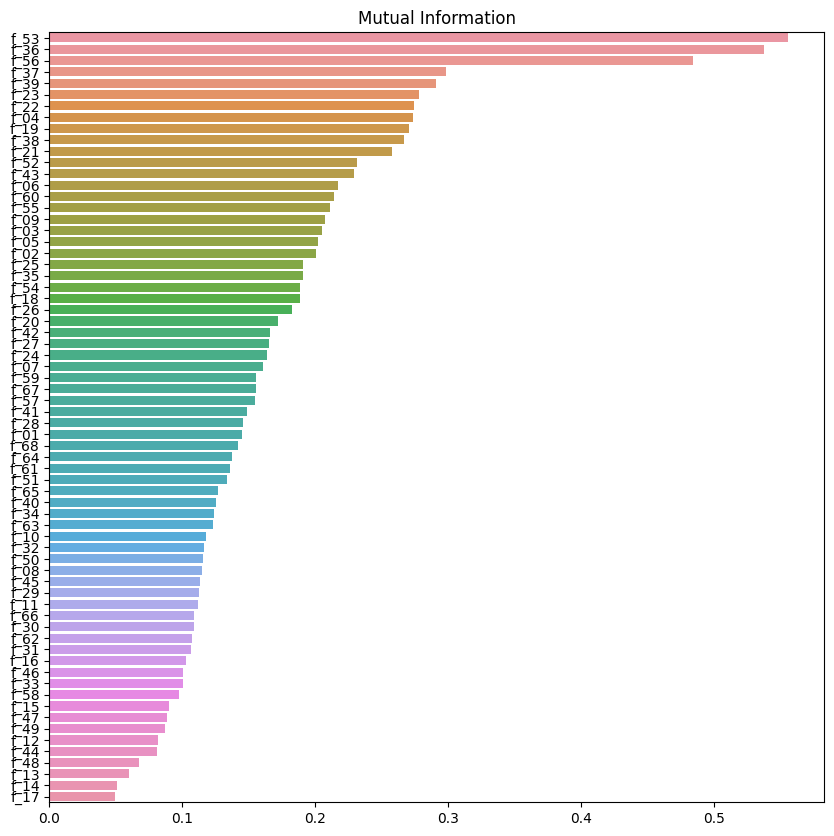

In [191]:
X = tracks.drop(['location'], axis = 1)
y = tracks['location']

mi = mutual_info_classif(X, y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending = False, inplace = True)


plt.figure(figsize = (10, 10))
sns.barplot(x = mi, y = mi.index)
plt.title('Mutual Information')
plt.show()

#### Aykırı Değer Analizi

Aykırı değer analizi için sklearn kütüphanesinden [Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest), [Local Outlier Factor](https://en.wikipedia.org/wiki/Local_outlier_factor), [EllipticEnvelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html) ve [OneClassSVM](https://en.wikipedia.org/wiki/One-class_classification) metodları kullanılarak aykırı değerler analiz edilerek metotların bulduğu değerler tablo olarak birbirleri ile karşılaştırılmak üzere tablolaştırılmıştır.

In [193]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(X)
y_noano = clf.predict(X)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

X_outliers_isf = X.iloc[y_noano[y_noano['Top'] == -1].index.values]

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
y_noano = clf.fit_predict(X)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

X_outliers_lof = X.iloc[y_noano[y_noano['Top'] == -1].index.values]

clf = EllipticEnvelope(contamination = 0.1)
y_noano = clf.fit_predict(X)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

X_outliers_ee = X.iloc[y_noano[y_noano['Top'] == -1].index.values]

clf = OneClassSVM(nu = 0.95 * 0.05)
y_noano = clf.fit_predict(X)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

X_outliers_ocsvm = X.iloc[y_noano[y_noano['Top'] == -1].index.values]
X_outliers = X.iloc[y_noano[y_noano['Top'] == -1].index.values]

# to drop outliers uncomment the following 2 lines
# X = X.iloc[y_noano[y_noano['Top'] == 1].index.values]
# y = y.iloc[y_noano[y_noano['Top'] == 1].index.values]

X_outliers = pd.concat([X_outliers_isf, X_outliers_lof, X_outliers_ee, X_outliers_ocsvm], axis = 0)
X_outliers = X_outliers.drop_duplicates()

print('Number of outliers predicted by isf: {}'.format(X_outliers_isf.shape[0]))
print('Number of outliers predicted by lof: {}'.format(X_outliers_lof.shape[0]))
print('Number of outliers predicted by ee: {}'.format(X_outliers_ee.shape[0]))
print('Number of outliers predicted by ocsvm: {}'.format(X_outliers_ocsvm.shape[0]))
print('Number of outliers predicted by all algorithms: {}'.format(X_outliers.shape[0]))
print('Number of rows without outliers: {}'.format(X.shape[0]))

Number of outliers predicted by isf: 90
Number of outliers predicted by lof: 106
Number of outliers predicted by ee: 106
Number of outliers predicted by ocsvm: 73
Number of outliers predicted by all algorithms: 197
Number of rows without outliers: 1059


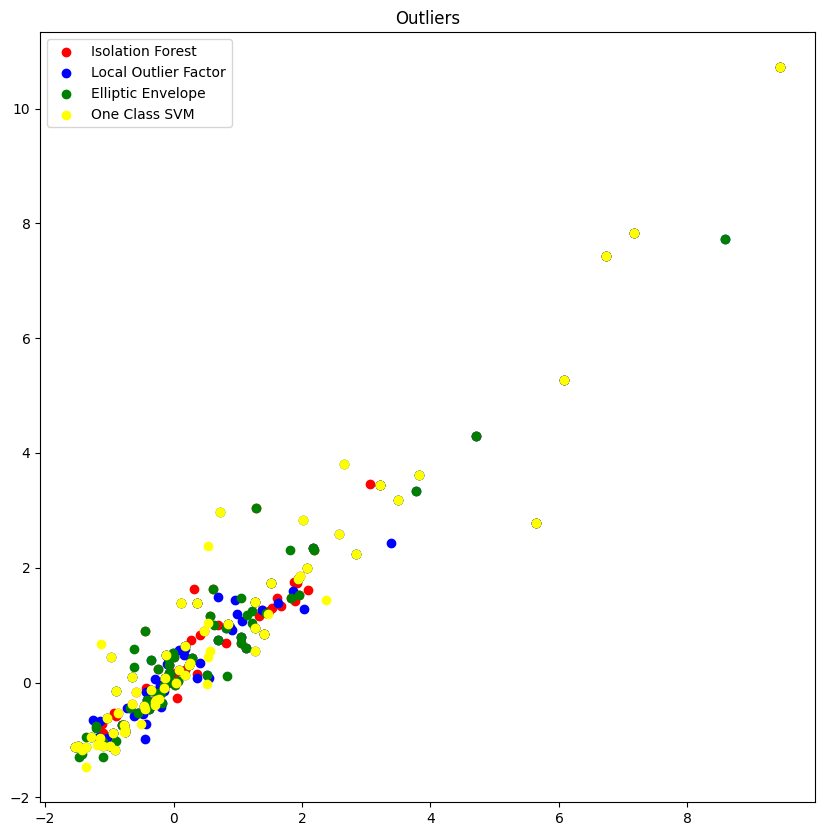

In [6]:
plt.figure(figsize = (10, 10))
plt.scatter(X_outliers_isf['f_01'], X_outliers_isf['f_02'], color = 'red', label = 'Isolation Forest')
plt.scatter(X_outliers_lof['f_01'], X_outliers_lof['f_02'], color = 'blue', label = 'Local Outlier Factor')
plt.scatter(X_outliers_ee['f_01'], X_outliers_ee['f_02'], color = 'green', label = 'Elliptic Envelope')
plt.scatter(X_outliers_ocsvm['f_01'], X_outliers_ocsvm['f_02'], color = 'yellow', label = 'One Class SVM')
plt.title('Outliers')
plt.legend()
plt.show()

# Sınıflama

En yaygın sınıflandırma algoritmalarından bazıları şunlardır:

**Lojistik Regresyon:** Bu, ikili sınıflandırma problemleri (iki olası sonucu olan problemler) için yaygın olarak kullanılan doğrusal bir modeldir.

**Karar Ağaçları:** Bu, verilerin özelliklerine dayalı olarak ağaç benzeri bir karar yapısı oluşturarak çalışan basit, yorumlanabilir bir modeldir.

**Random Forests:** Bu, daha doğru ve kararlı bir model oluşturmak için birden fazla karar ağacının tahminlerini birleştiren bir topluluk yöntemidir.

**Destek Vektör Makineleri (SVM'ler):** Bu, farklı sınıfları maksimum düzeyde ayıran yüksek boyutlu bir uzayda hiperdüzlemi bularak çalışan güçlü ve esnek bir modeldir.

**K-En Yakın Komşular (KNN):** Bu, eğitim verilerinde test veri noktasına en çok benzeyen K gözlemlerini bularak ve bu K gözlemlerinin çoğunluk sınıfını kullanarak çalışan basit, parametrik olmayan bir modeldir.

**Naive Bayes:** Veriler verildiğinde belirli olayların meydana gelme olasılığına dayalı olarak tahminler yapan olasılıksal bir modeldir.

Gradyan Yükseltme, AdaBoost, Stokastik Gradyan İnişi (SGD), Lineer Diskriminant Analizi (LDA), İkinci Dereceden Ayrım Analizi (QDA), Doğrusal Regresyon, Sırt Regresyonu,, Kement Regresyonu gibi daha bir çok algoritma veri biliminde yaygın olarak kullanılmaktadır. Bu algoritmaların her birinin kendi güçlü ve zayıf yönleri vardır ve belirli bir problem için en iyi olan özel algoritma, verilerin özelliklerine ve analizin hedeflerine bağlı olacaktır.

In [196]:
def visualize_cm(cm, title: str):
    """Visualize confusion matrix."""
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title('Confusion matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def visualize_cr(cr: dict, title: str):
    """Visualize classification report."""
    plt.figure(figsize = (10, 10))
    sns.heatmap(pd.DataFrame(cr).T, annot = True, cmap = 'Blues')
    plt.title('Classification report for {}'.format(title))
    plt.show()

In [197]:
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
nn = MLPClassifier(max_iter = 1000)
ab = AdaBoostClassifier()
sgd = SGDClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
gpc = GaussianProcessClassifier()


models = {'Logistic Regression': {'model': lr},
          'Decision Tree Classifier': {'model': dt},
          'Random Forest Classifier': {'model': rf},
          'Support Vector Machines': {'model':svm},
          'K-Nearest Neighbors': {'model':knn},
          'Naive Bayes': {'model': nb},
          'Neural Networks': {'model': nn},
          'AdaBoost': {'model': ab},
          'Stochastic Gradient Descent': {'model':sgd},
          'Linear Discriminant Analysis': {'model':lda},
          'Quadratic Discriminant Analysis': {'model':qda},
          'Gaussian Process Classification': {'model':gpc}
          }



Accuracy of Logistic Regression on test set: 0.38
Cross Validation Scores for Logistic Regression: [0.38679245 0.38679245 0.40566038 0.39622642 0.4245283  0.4245283
 0.38679245 0.40566038 0.37735849 0.42857143]
Cross Validation Scores for Logistic Regression (mean): 0.402


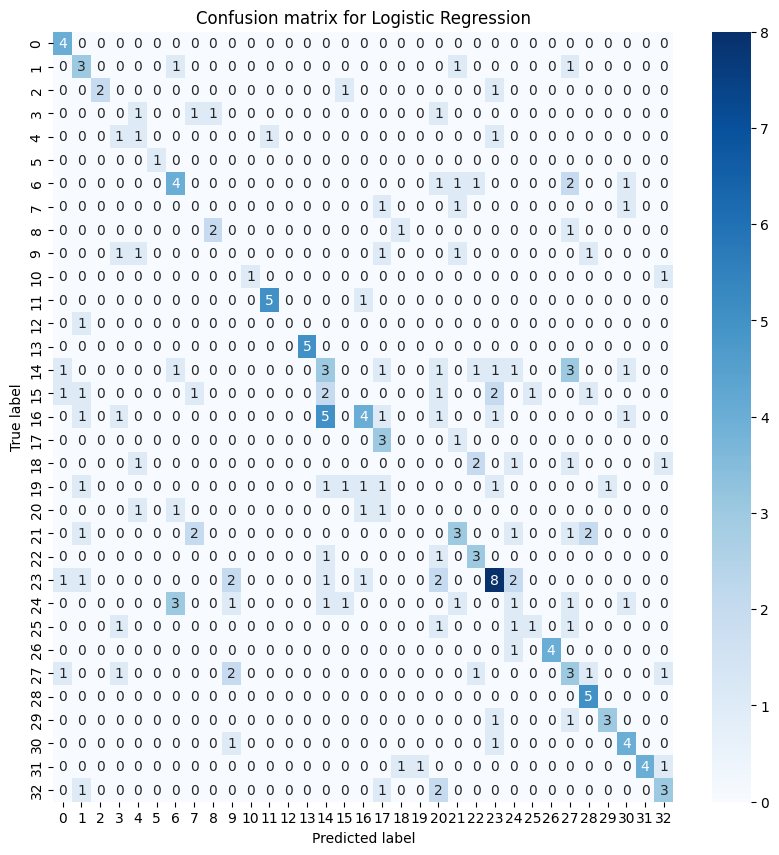

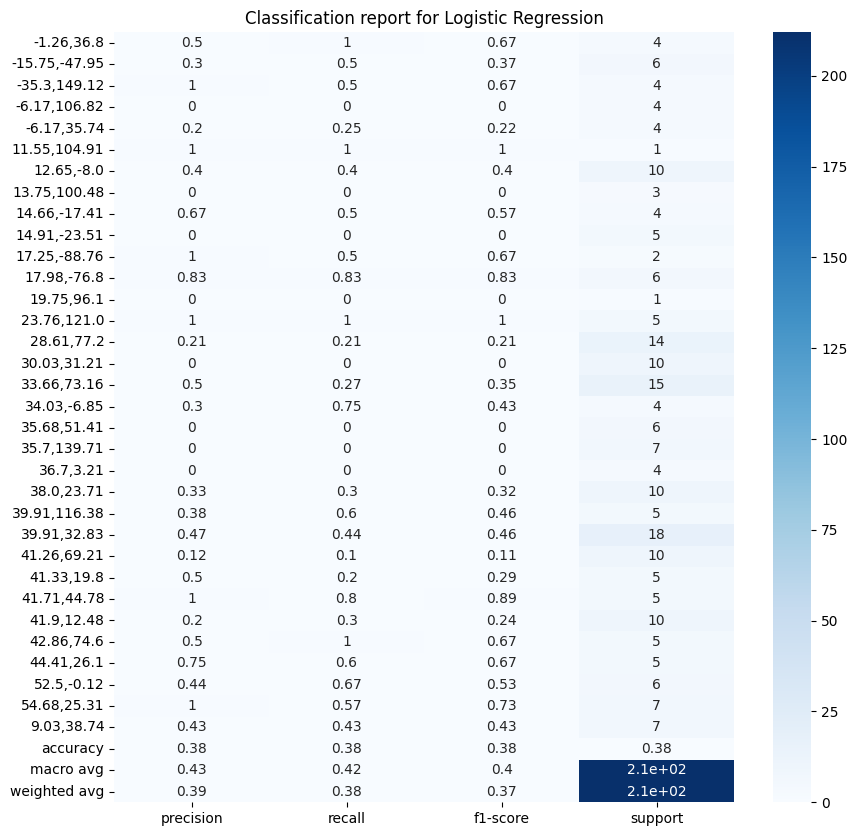

Accuracy of Decision Tree Classifier on test set: 0.30
Cross Validation Scores for Decision Tree Classifier: [0.20754717 0.22641509 0.24528302 0.28301887 0.33018868 0.29245283
 0.19811321 0.21698113 0.24528302 0.21904762]
Cross Validation Scores for Decision Tree Classifier (mean): 0.246


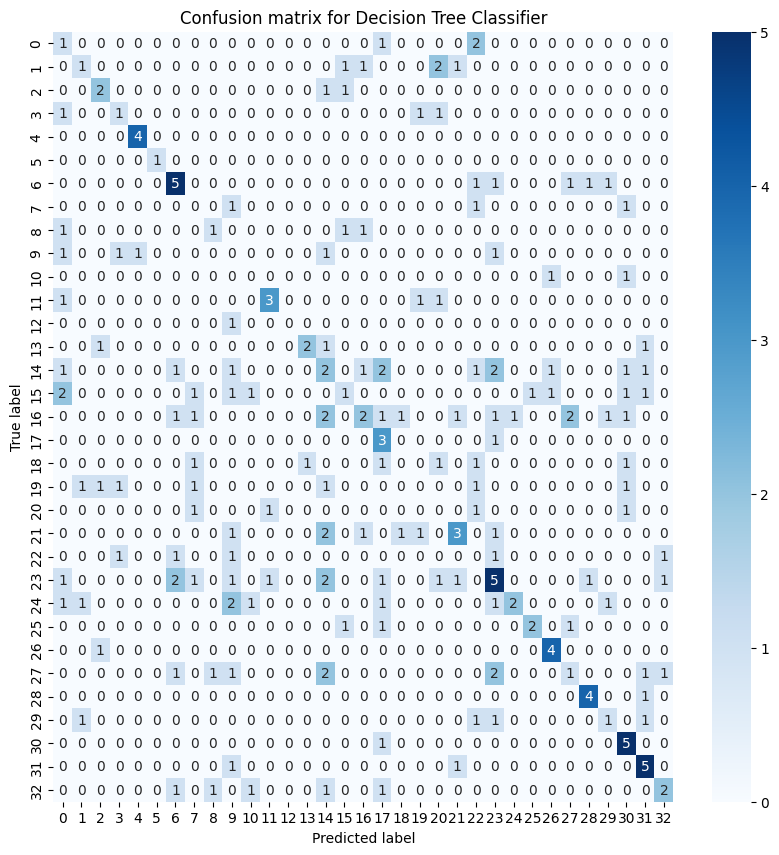

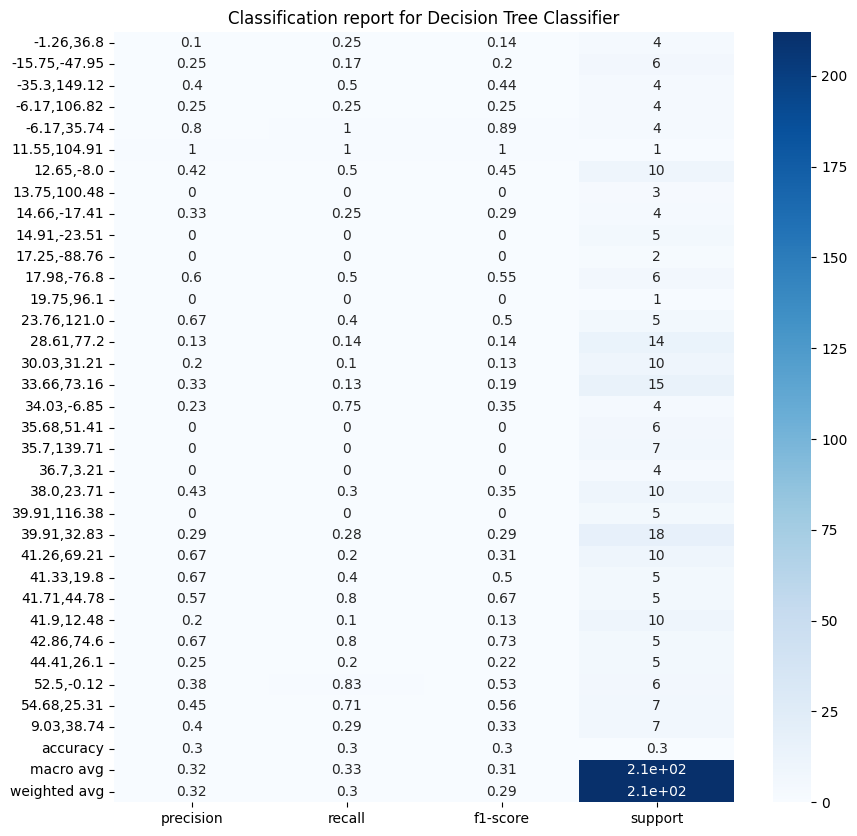

Accuracy of Random Forest Classifier on test set: 0.42
Cross Validation Scores for Random Forest Classifier: [0.38679245 0.44339623 0.49056604 0.47169811 0.51886792 0.49056604
 0.4245283  0.40566038 0.41509434 0.41904762]
Cross Validation Scores for Random Forest Classifier (mean): 0.447


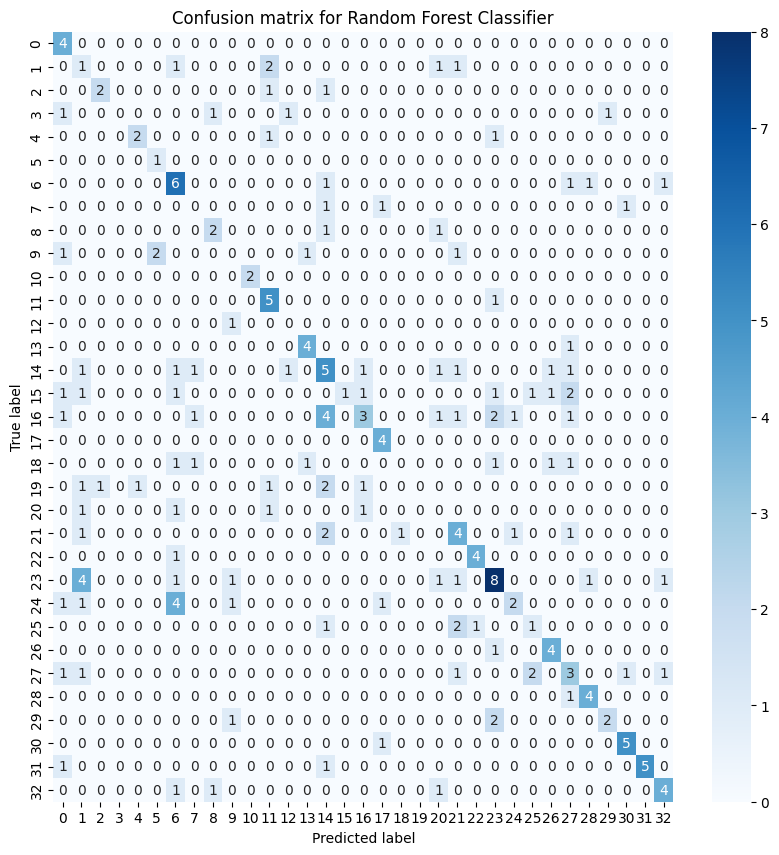

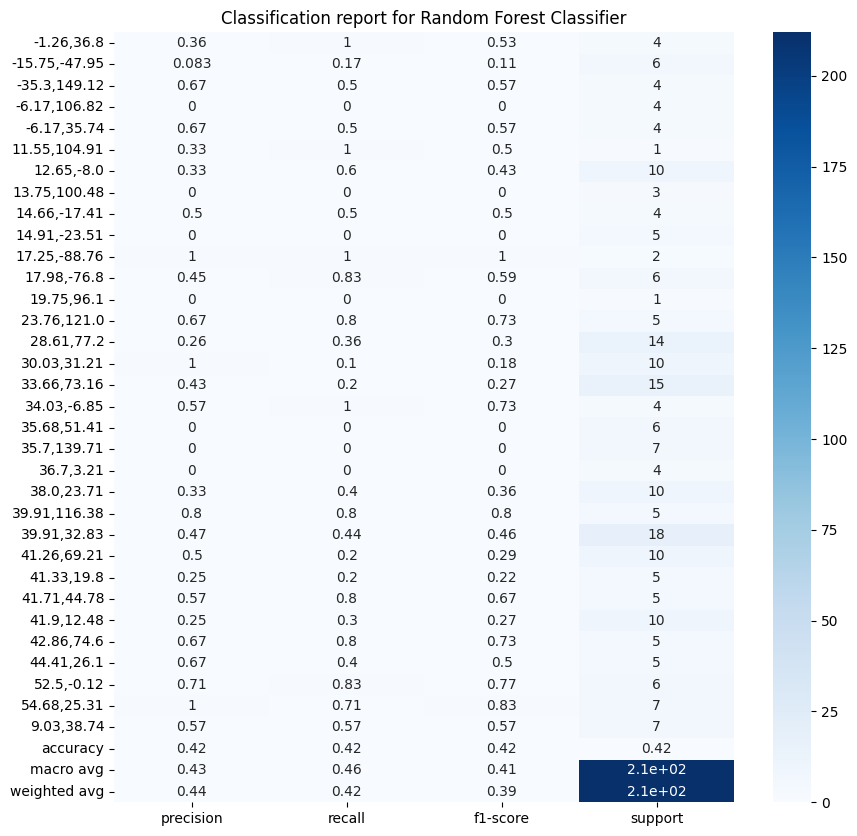

Accuracy of Support Vector Machines on test set: 0.39
Cross Validation Scores for Support Vector Machines: [0.3490566  0.40566038 0.44339623 0.44339623 0.49056604 0.46226415
 0.35849057 0.4245283  0.33962264 0.4       ]
Cross Validation Scores for Support Vector Machines (mean): 0.412


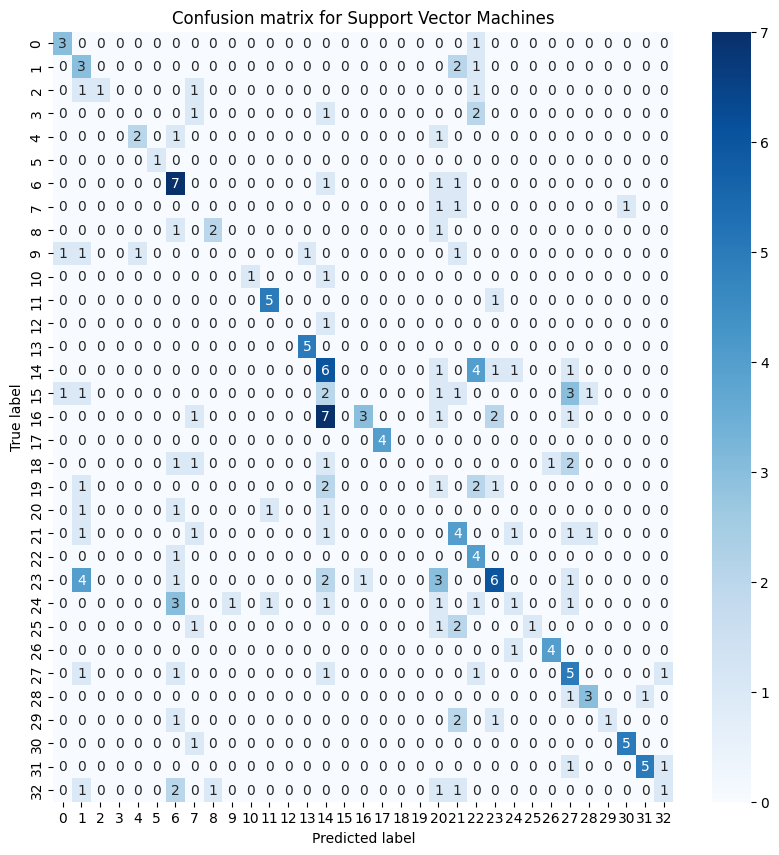

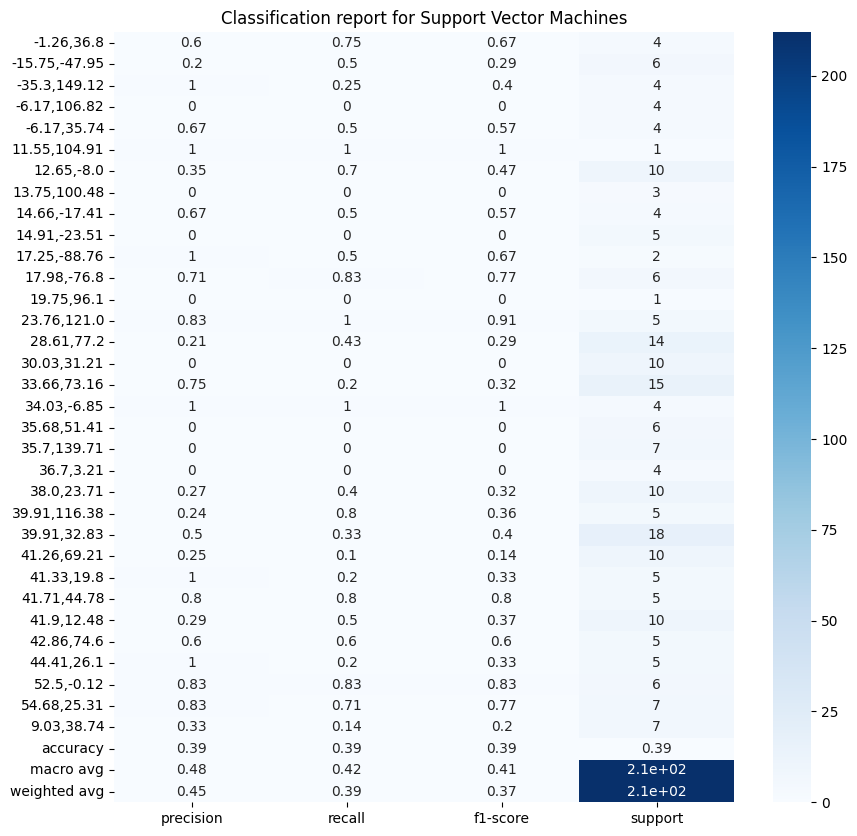

Accuracy of K-Nearest Neighbors on test set: 0.35
Cross Validation Scores for K-Nearest Neighbors: [0.3490566  0.32075472 0.39622642 0.37735849 0.41509434 0.37735849
 0.35849057 0.37735849 0.36792453 0.36190476]
Cross Validation Scores for K-Nearest Neighbors (mean): 0.370


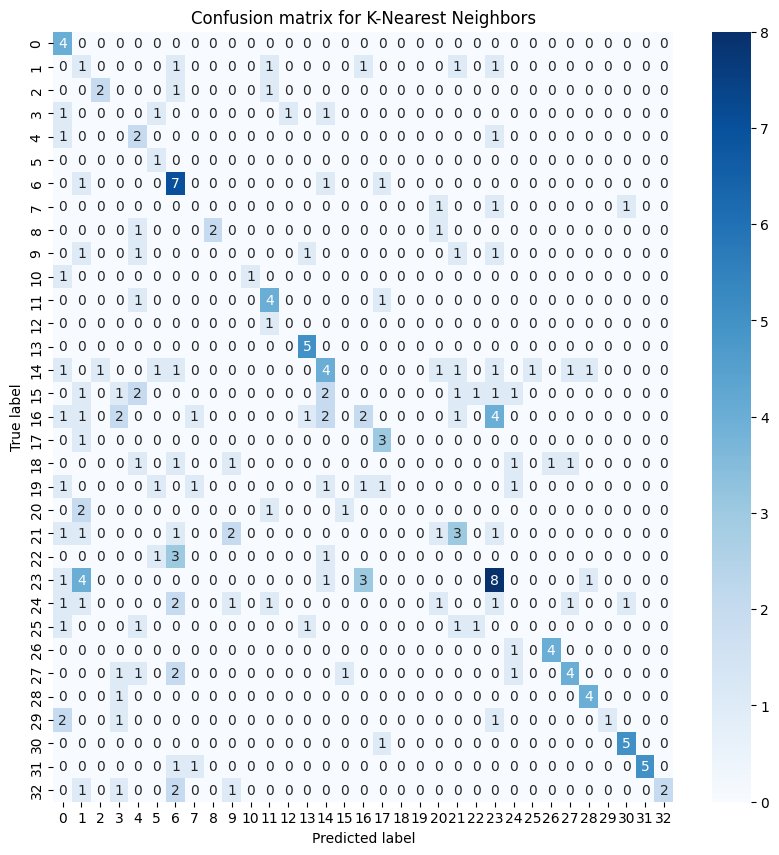

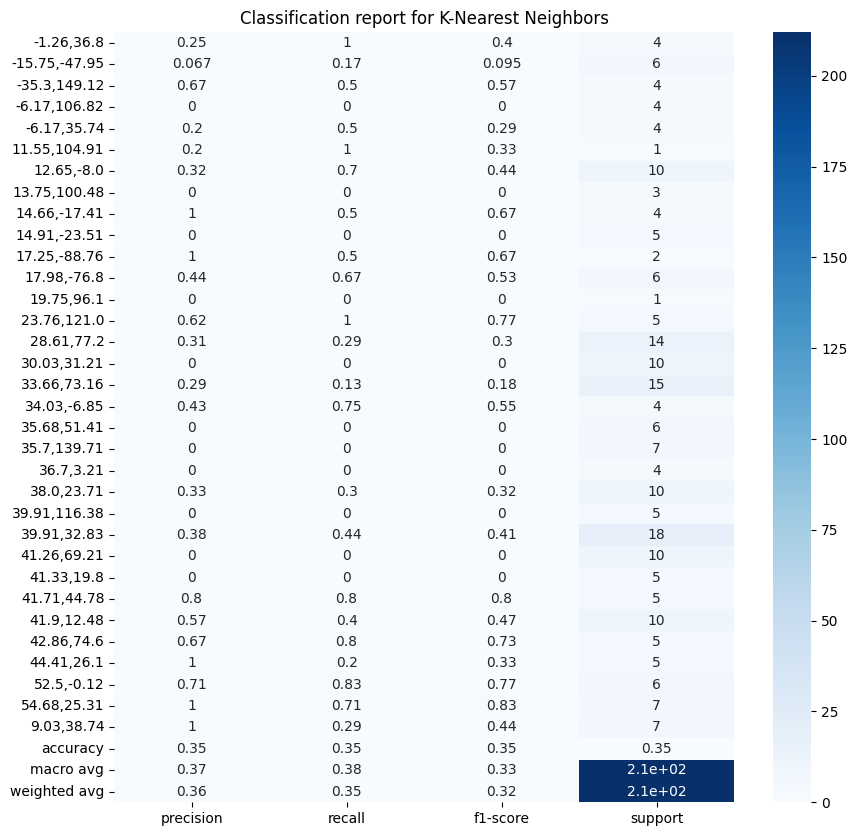

Accuracy of Naive Bayes on test set: 0.28
Cross Validation Scores for Naive Bayes: [0.31132075 0.32075472 0.33018868 0.33962264 0.36792453 0.41509434
 0.27358491 0.32075472 0.22641509 0.3047619 ]
Cross Validation Scores for Naive Bayes (mean): 0.321


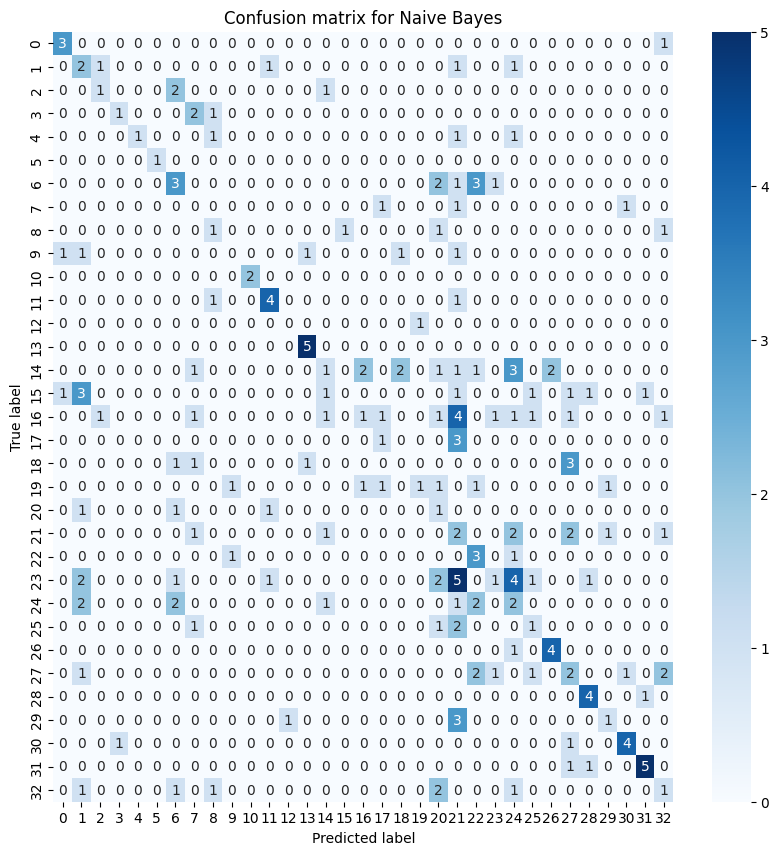

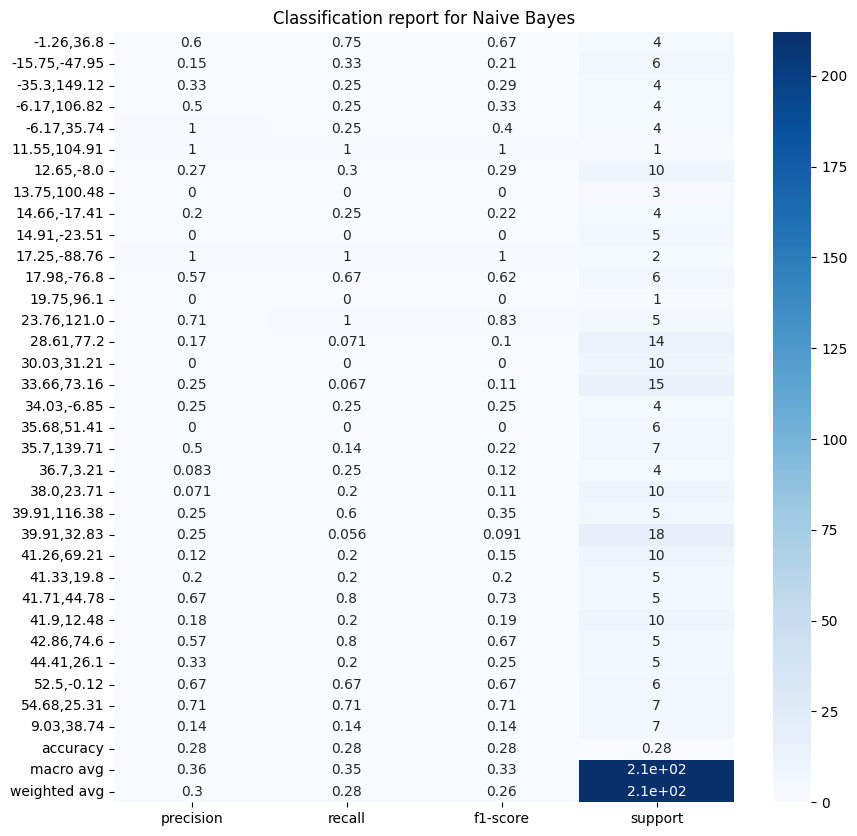

Accuracy of Neural Networks on test set: 0.43
Cross Validation Scores for Neural Networks: [0.39622642 0.38679245 0.43396226 0.45283019 0.49056604 0.50943396
 0.39622642 0.40566038 0.44339623 0.41904762]
Cross Validation Scores for Neural Networks (mean): 0.433


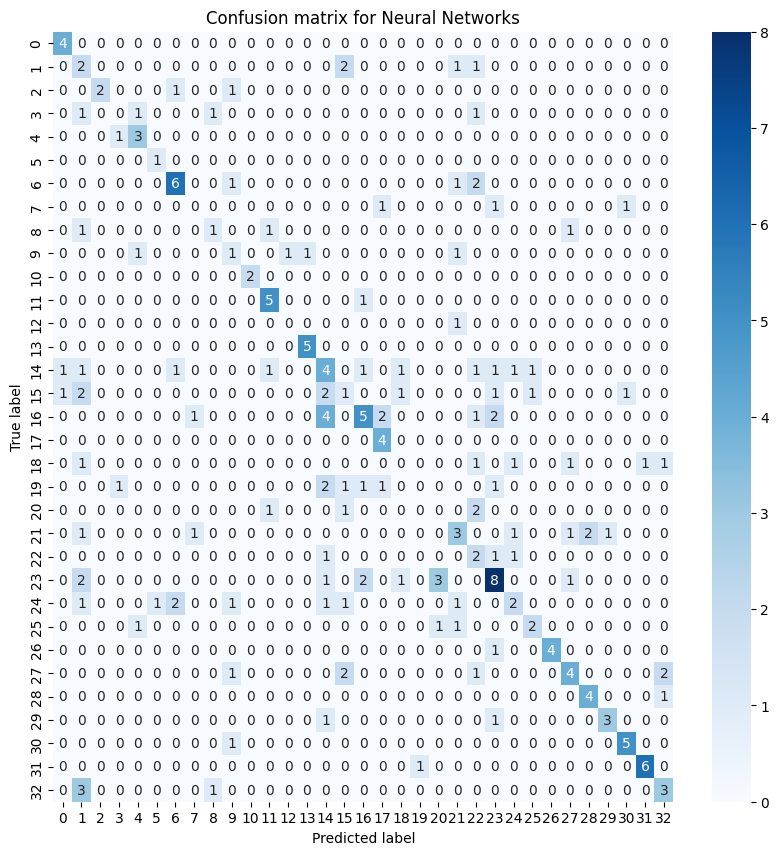

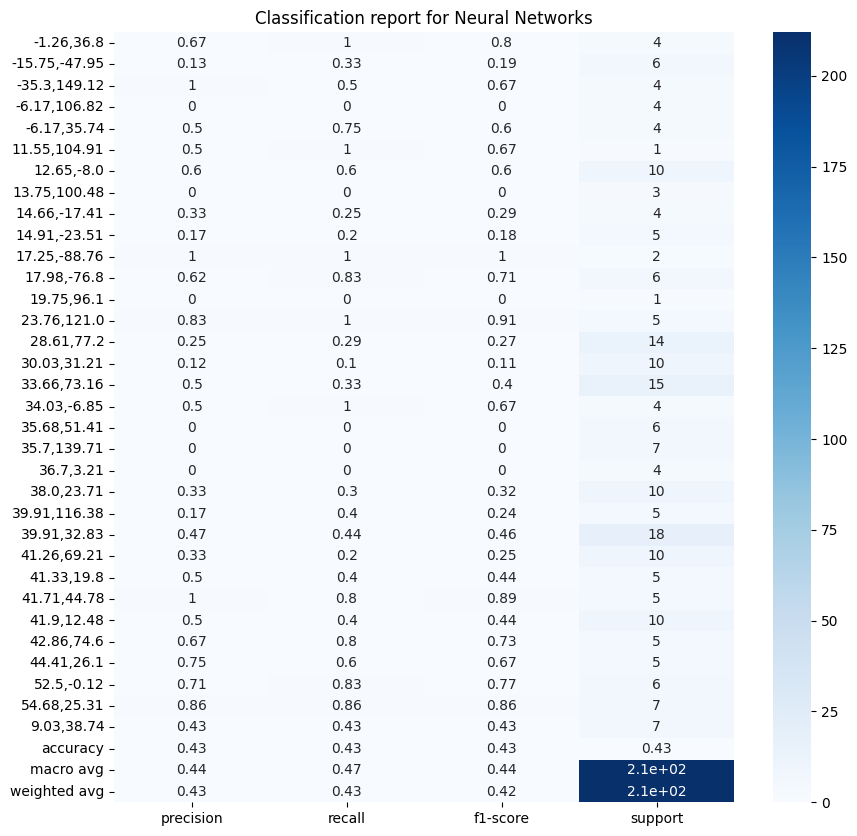

Accuracy of AdaBoost on test set: 0.09
Cross Validation Scores for AdaBoost: [0.10377358 0.10377358 0.16037736 0.14150943 0.10377358 0.10377358
 0.10377358 0.10377358 0.11320755 0.12380952]
Cross Validation Scores for AdaBoost (mean): 0.116


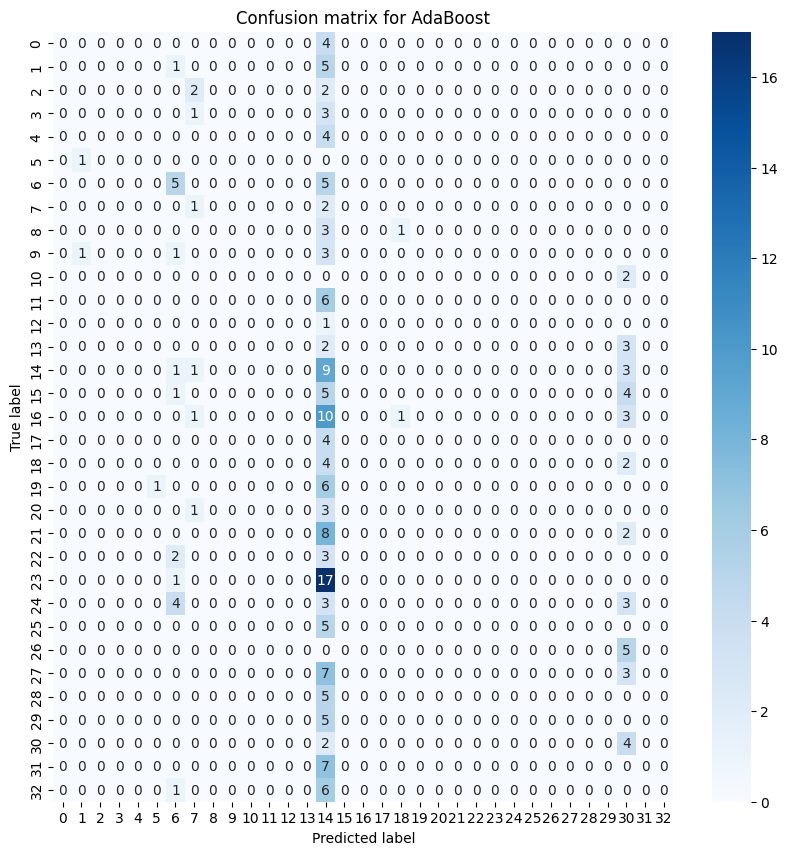

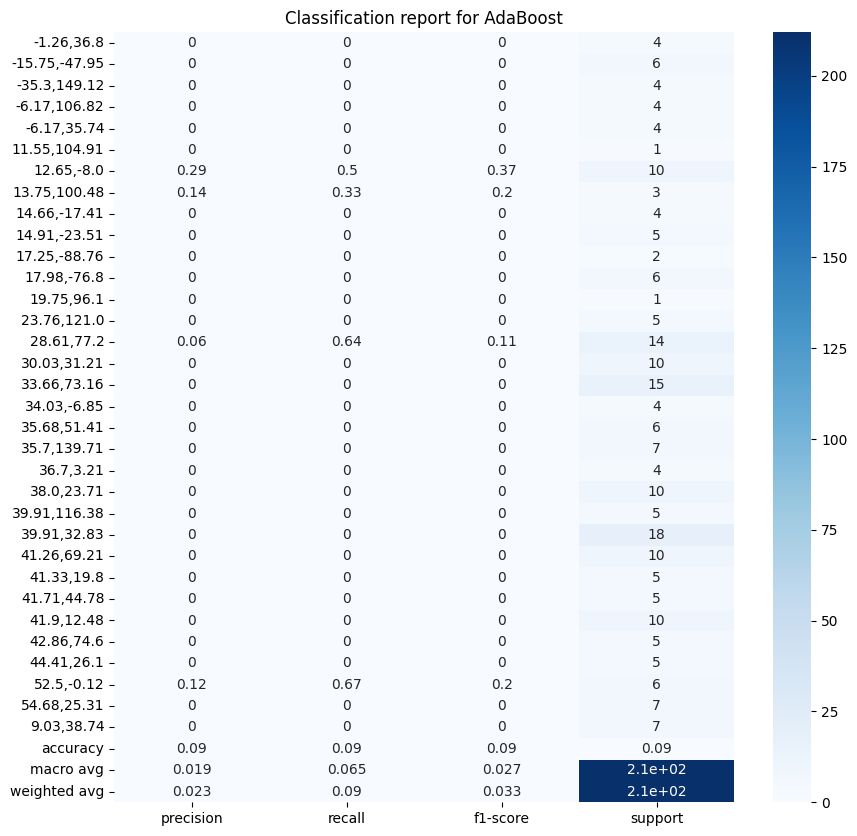

Accuracy of Stochastic Gradient Descent on test set: 0.32
Cross Validation Scores for Stochastic Gradient Descent: [0.29245283 0.33018868 0.27358491 0.37735849 0.36792453 0.37735849
 0.33018868 0.36792453 0.37735849 0.37142857]
Cross Validation Scores for Stochastic Gradient Descent (mean): 0.347


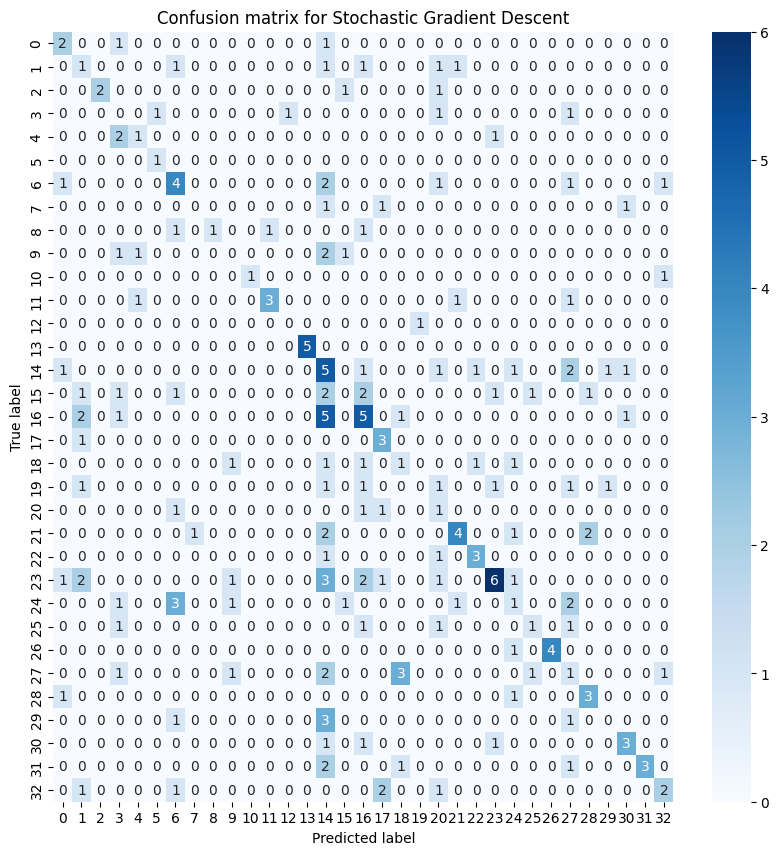

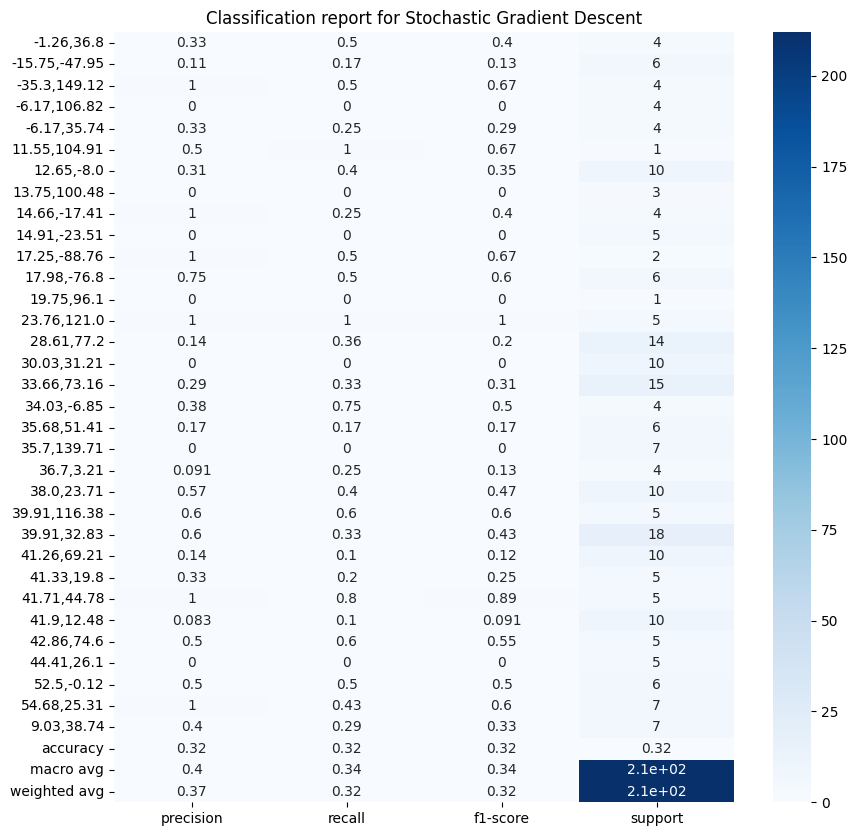

Accuracy of Linear Discriminant Analysis on test set: 0.44
Cross Validation Scores for Linear Discriminant Analysis: [0.38679245 0.4245283  0.43396226 0.39622642 0.47169811 0.47169811
 0.39622642 0.41509434 0.41509434 0.4       ]
Cross Validation Scores for Linear Discriminant Analysis (mean): 0.421


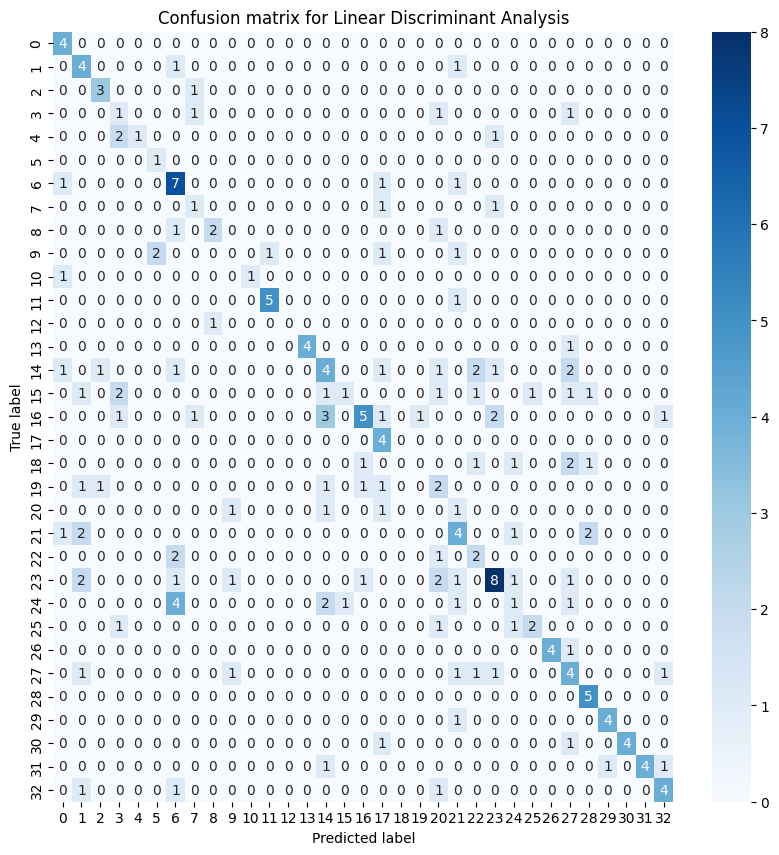

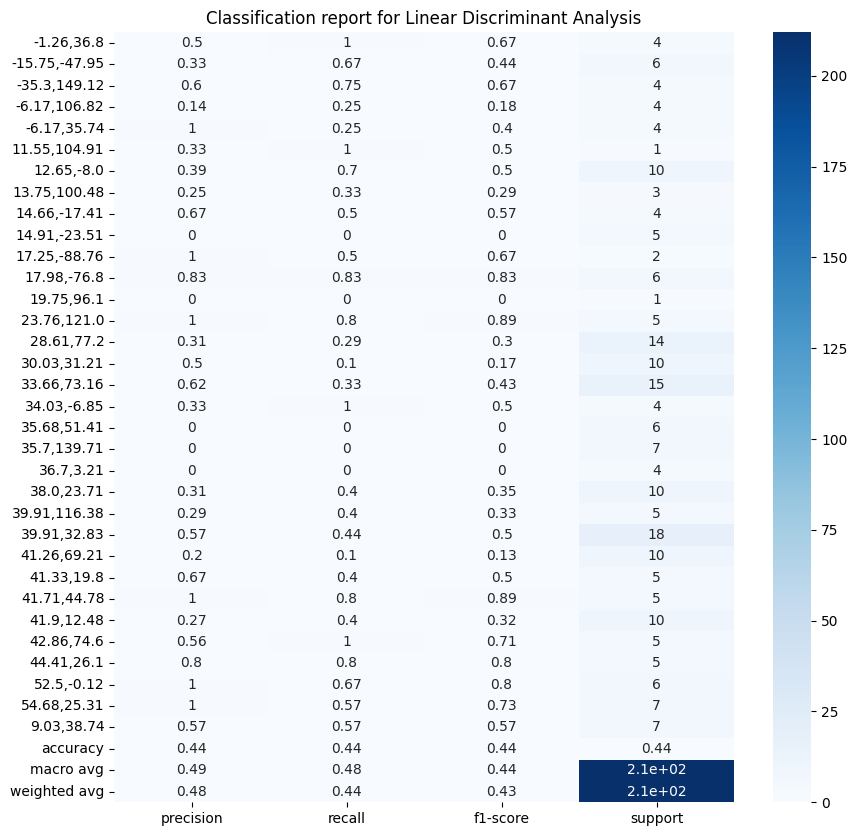

/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.

Accuracy of Quadratic Discriminant Analysis on test set: 0.07


/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Cross Validation Scores for Quadratic Discriminant Analysis: [0.         0.00943396 0.03773585 0.04716981 0.06603774 0.05660377
 0.04716981 0.02830189 0.04716981 0.02857143]
Cross Validation Scores for Quadratic Discriminant Analysis (mean): 0.037


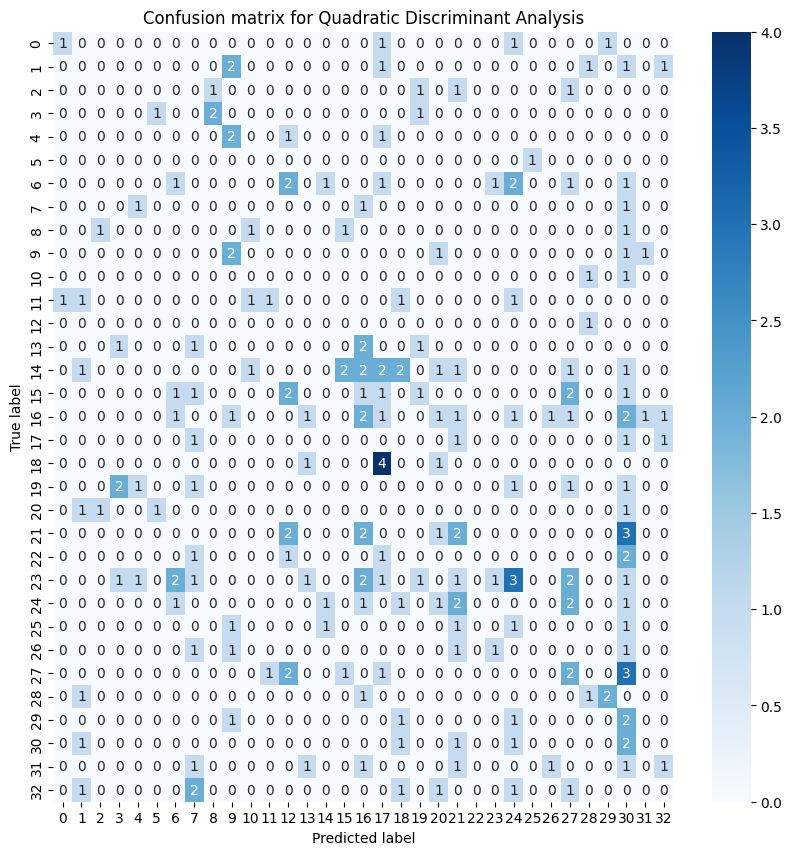

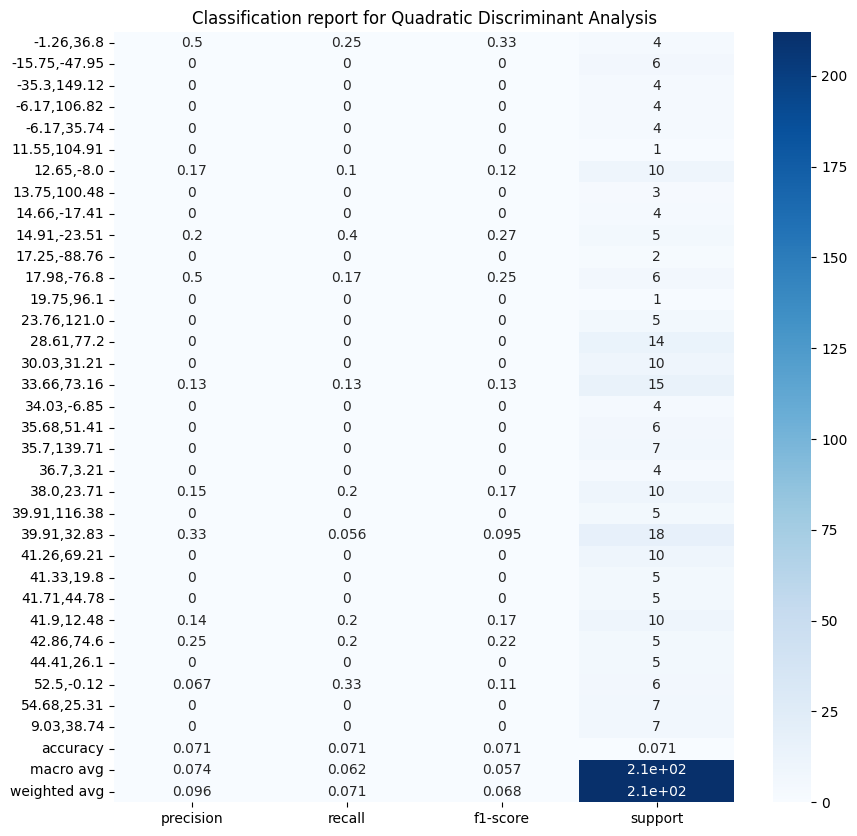

Accuracy of Gaussian Process Classification on test set: 0.39
Cross Validation Scores for Gaussian Process Classification: [0.30188679 0.35849057 0.39622642 0.44339623 0.46226415 0.44339623
 0.31132075 0.40566038 0.37735849 0.39047619]
Cross Validation Scores for Gaussian Process Classification (mean): 0.389


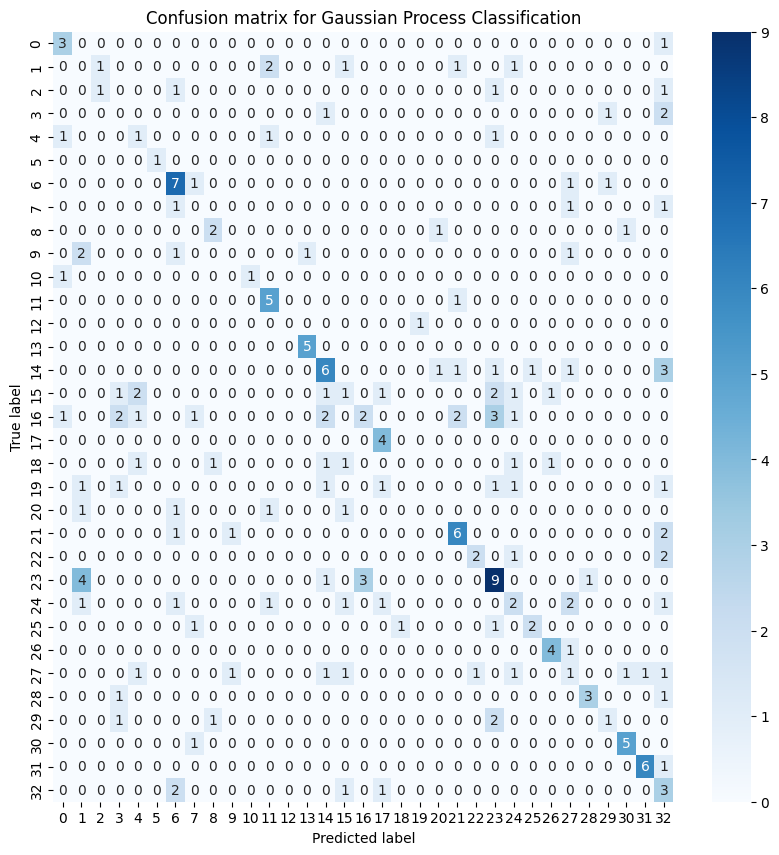

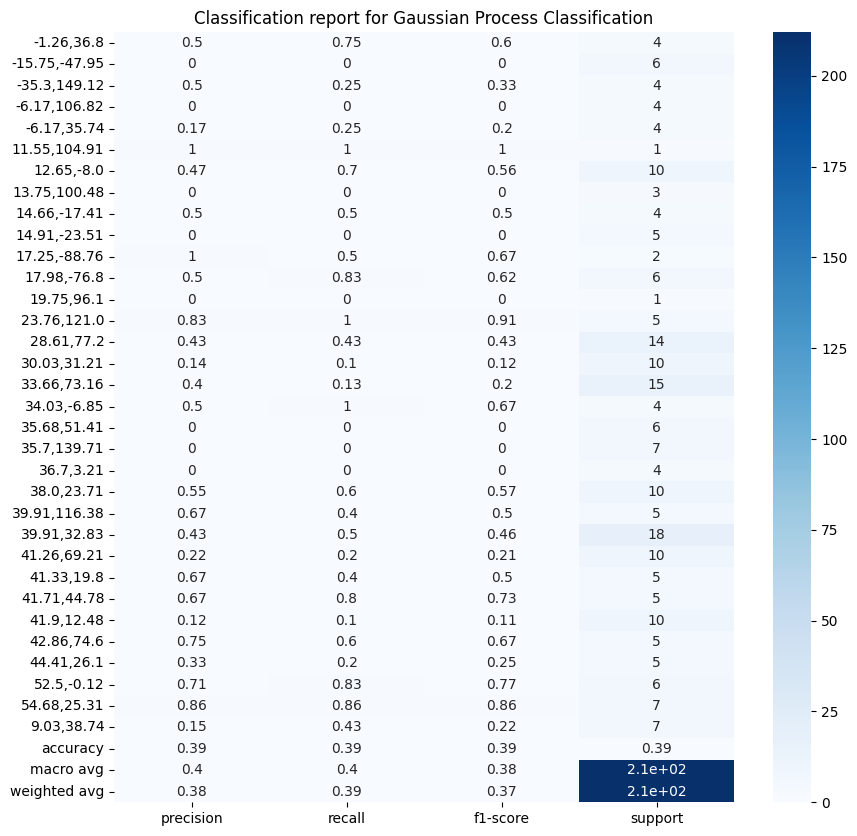

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# train the models
for name, model_dict in models.items():
    model_dict['model'].fit(X_train, y_train)
    y_pred = model_dict['model'].predict(X_test)
    
    accuracy_score_of = accuracy_score(y_test, y_pred)
    print('Accuracy of {} on test set: {:.2f}'.format(name, accuracy_score_of))
    
    cv_scores = cross_val_score(model_dict['model'], X, y, cv=10)
    print('Cross Validation Scores for {}: {}'.format(name, cv_scores))
    print('Cross Validation Scores for {} (mean): {:.3f}'.format(name, np.mean(cv_scores)))

    cm = confusion_matrix(y_test, y_pred)
    visualize_cm(cm, name)

    cr = classification_report(y_test, y_pred, output_dict = True, zero_division = 0)
    visualize_cr(cr, name)

    model_dict['cr'] = cr
    model_dict['accuracy_score'] = accuracy_score_of
    model_dict['cv_scores'] = cv_scores
    model_dict['cm'] = cm


In [204]:
def evaluate(models, X_train, X_test, y_train, y_test):
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model_dict in models.items():
        # predict the test set results
        y_pred = model_dict['model'].predict(X_test)
        # evaluate the model and append its score to model_scores
        model_scores[name] = {'Accuracy': accuracy_score(y_test, y_pred),
                              'Precision': precision_score(y_test, y_pred, average = 'weighted'),
                              'Recall': recall_score(y_test, y_pred, average = 'weighted'),
                              'F1': f1_score(y_test, y_pred, average = 'weighted')}
    return model_scores

model_evaluation_scores = evaluate(models = models,
                                X_train = X_train,
                                X_test = X_test,
                                y_train = y_train,
                                y_test = y_test)

/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ma/Library/Python/3.9/lib/python/site-packages/sklearn

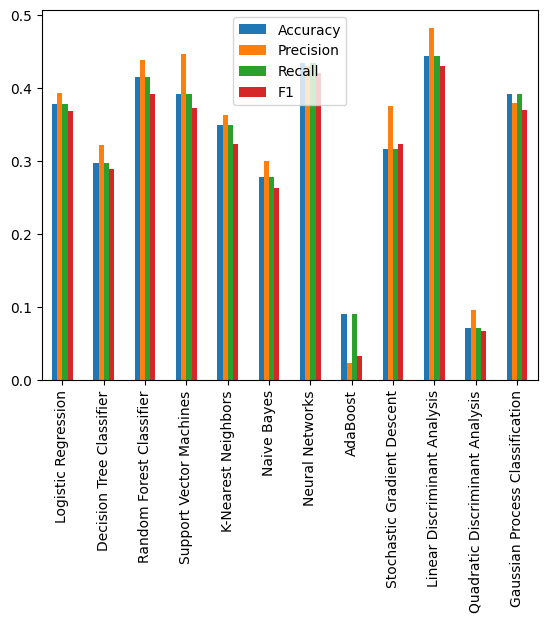

In [205]:
# visualize the model scores
model_compare = pd.DataFrame(model_evaluation_scores)
model_compare.T.plot.bar()
plt.xticks(rotation = 90)
plt.show()

### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA), makine öğrenimi ve istatistikte sıklıkla kullanılan bir öğrenme algoritmasıdır. Bu algoritma, sınıflar arasında en iyi şekilde ayrıştıran doğrusal bir özellik kombinasyonunu bulma fikrine dayanır.

LDA şu şekilde çalışır:

1. Algoritma ilk olarak, her sınıfın verilerinin Gauss dağılımından çekildiğini varsayar.
2. Daha sonra, her sınıf için Gauss dağılımının parametrelerini (ortalama ve varyans) tahmin eder.
3. Sonra, sınıflar arasında en iyi şekilde ayrıştıran doğrusal özellik kombinasyonunu bulur. Bu, sınıflar arası yayılım ile sınıflar içi yayılımı arasındaki oranı en yüksek olan kombinasyonu bulmak suretiyle yapılır.
4. Son olarak, verileri doğrusal özellik kombinasyonuna yansıtır ve yeni veri noktalarını sınıflandırmak için basit bir eşik kullanır.

LDA, sınıflandırma görevleri için kullanışlı bir algoritmadır çünkü kolayca uygulanır, hızlı bir şekilde eğitilebilir ve çeşitli veri kümelerinde iyi bir performans gösterir. Ayrıca, bazı diğer sınıflandırma algoritmalarına göre daha az overfittinge duyarlıdır. Ancak, bazı kısıtlamaları da vardır. Örneğin, verilerin Gauss dağılımı izlediğini varsayar, bu her zaman olmayabilir. Ayrıca, sınıfların eşit varyanslara sahip olduğunu varsayar, bu da her zaman doğru olmayabilir.

Genel olarak, LDA sınıflandırma görevleri için basit ve etkili bir algoritmadır.

### Support Vector Machines

Support Vector Machines (SVM) bir sınıflandırma algoritmasıdır ve çoklu sınıflandırma görevleri için de kullanılabilir. Bu algoritma, veri noktalarını iki sınıfa bölmek için en iyi şekilde çalışan doğrusal bir ayırıcı çizgiyi bulmayı hedefler. SVM algoritması, veri noktalarının sınıflandırılması için doğrusal olmayan çizgiler de kullanabilir, ancak bunlar için daha fazla özellik dönüşümü gerekir.

SVM algoritması çalışma şeklini şu şekilde özetleyebiliriz:

1. Öncelikle, veri noktalarının sınıflandırılması için doğrusal bir ayırıcı çizgi bulunur. Bu çizgi, veri noktalarının en büyük mümkün mesafeyi sağladığı noktalardan geçer. Bu noktalara "destek vektörleri" denir.
2. Daha sonra, veri noktaları destek vektörlerine göre sınıflandırılır.
3. Sınıflandırma işlemi tamamlandıktan sonra, yeni gelen veri noktalarının sınıflandırılması için aynı doğrusal çizgi kullanılır.

SVM algoritması, veri noktalarını doğrusal olmayan çizgilerle de sınıflandırabilir. Bunun için, veri noktalarını daha yüksek boyutlu bir uzayda dönüştürür ve orada doğrusal bir ayırıcı çizgi bulunur. Bu işlem "özellik dönüşümü" olarak adlandırılır.

SVM algoritması, veri noktalarını en iyi şekilde ayrıştıran doğrusal çizgiyi bulma kabiliyetine sahip olması nedeniyle çok popülerdir ve çeşitli veri kümelerinde iyi bir performans gösterir. Ancak, algoritmanın performansı büyük veri kümelerinde yavaş olabilir ve hiperparametrelerin doğru ayarlanması gerekir.

### Neural Networks

Neural Networks (NN), sınıflandırma ve regresyon görevleri için kullanılan bir makine öğrenimi algoritmasıdır. NN, birçok gizli katmanı olan bir sinir ağı yapısına sahiptir ve bu katmanlar arasında veri taşınır. Gizli katmanlar arasındaki veri taşınışı, ağırlık değerleri ile kontrol edilir. Ağırlık değerleri, öğrenme sırasında optimize edilir ve ağın performansını etkiler.

NN'ler, çok sayıda girdi verisi alır ve bu verileri işleyerek bir çıktı üretir. Örneğin, bir sınıflandırma görevi için, NN girdi olarak resimler alabilir ve bunları işleyerek resmin neye ait olduğunu sınıflandırır. NN'ler, öğrenme sırasında ağırlık değerlerini optimize ederek daha iyi performans gösterirler.

NN'ler, çok sayıda girdi verisi işleyebildiğinden, çok sayıda özellik içeren veri kümelerinde iyi bir performans gösterirler. Ayrıca, NN'ler, veri örüntülerini öğrenme kabiliyetine sahiptirler ve bu öğrendiklerini yeni veri noktaları için kullanabilirler. Ancak, NN'lerin performansı hiperparametrelerin doğru ayarlanmasına bağlıdır ve bazen overfitting problemine neden olabilirler.

# Kümeleme:

Kümeleme, benzer veri noktalarını kümelere gruplandıran bir süpervizyon olmaksızın makine öğrenimi tekniğidir. Kümeleme amacı, verideki desenleri tespit etmek ve veri noktalarını benzerliklerine göre gruplandırmaktır. Kümeleme algoritmaları, görüntü bölütleme, anomali tespiti ve müşteri bölütleme gibi çeşitli uygulamalarda kullanılır.

Popüler kümeleme algoritmaları arasında şunlar bulunur:

**K-Means Kümeleme**: Bu, en popüler ve basit kümeleme algoritmalarından biridir. Rastgele bir sayıda (k) merkez noktası seçerek başlar ve sonra her veri noktasını en yakın merkez noktasına atar. Merkez noktaları, onlara atan veri noktalarının ortalamasına göre güncellenir ve işlem dönmeye devam eder.

**Hiyerarşik Kümeleme:** Bu algoritma, veri noktalarının tek tek başladığı ve ilerleyen algoritma sırasında daha büyük ve daha büyük kümelere birleştirildiği bir küme hiyerarşisi oluşturur. Hiyerarşik kümeleme iki ana tiptedir: agglomerative (aşağıdan yukarı) ve divisive (yukarıdan aşağı).

**DBSCAN (Gürültülü Uygulamalar İçin Yoğunluğa Dayalı Uzaysal Kümeleme):** Bu algoritma, merkez noktalarından değil, yoğunluktan veri noktalarını kümelere ayırır. DBSCAN, belirli bir mesafedeki (Eps parametresi olarak adlandırılan) komşu noktalarının yüksek sayısına sahip "çekirdek noktaları" belirleyerek başlar ve sonra kümeyi, çekirdek noktalarından erişilebilen tüm noktaları da içerecek şekilde genişletir.

**Gaussian Karması Modeli (GMM):** Bu, verinin birkaç farklı Gaussian dağılımından oluşan bir karışımdan üretildiği varsayımlarına dayalı bir olasılık modelidir. GMM, küresel olmayan veya açıkça ayrılmış olan veriyi modellemek için esnek bir algoritmadır.

**Spektral Kümeleme:** Bu algoritma, veri noktaları arası benzerliği kodlayan bir benzerlik matrisinin eigenvectors'ını kullanarak veriyi düşük boyutlu bir uzayda projeler ve sonra projekte edilmiş veri üzerinde başka bir kümeleme algoritmasını (örneğin k-means) uygular. Spektral kümeleme, doğrusal olarak ayırt edilemeyen veri için özellikle yararlıdır.

Bunların dışında Fuzzy C-Means (FCM), Self-Organizing Map (SOM), Affinity Propagation, Mean-Shift,, Expectation-Maximization (EM), Agglomerative Information Bottleneck (AIB), Single Linkage Clustering, Ward's Method, Complete Linkage Clustering, Birch Clustering gibi algoritmalar da bulunmaktadır. Hangi algoritmanın en uygun olduğu, verinizin özelliklerine ve kümeleme amacınıza göre değişebilir. Bu yüzden, veri kümenizi inceleyerek hangi algoritmanın en uygun olduğunu belirlemeye çalışmak gerekir.

In [253]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import plotly.express as px
import plotly.graph_objects as go



In [258]:
kmeans = KMeans(n_clusters = 33, random_state = 42)
agg = AgglomerativeClustering(n_clusters = 33, affinity = 'euclidean', linkage = 'ward')
dbscan = DBSCAN(eps = 0.3, min_samples = 10)
spectral = SpectralClustering(n_clusters = 33, affinity = 'nearest_neighbors')
gmm = GaussianMixture(n_components = 33, covariance_type = 'full')
bgmm = BayesianGaussianMixture(n_components = 33, covariance_type = 'full')

clusters = {
    'K-Means': {'model': kmeans},
    'Agglomerative Clustering': {'model': agg},
    'DBSCAN': {'model': dbscan},
    'Spectral Clustering': {'model': spectral},
    'Gaussian Mixture': {'model': gmm},
    'Bayesian Gaussian Mixture': {'model': bgmm}
}

In [259]:
def visualize_cluster(X, y, title: str):
    """Visualize clusters."""
    plt.figure(figsize = (10, 10))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 50, cmap = 'viridis')
    plt.title(title)
    plt.show()

    prediction = pd.Series(y).value_counts().sort_index()
    prediction.plot(kind = 'bar') # bar plot
    # increase width of bars
    plt.gcf().set_size_inches(10, 5)
    plt.xlabel('Cluster number')
    plt.ylabel('Number of predictions')
    plt.title(title)
    for i, v in enumerate(prediction):
        plt.text(i, v + 1, str(v), horizontalalignment = 'center')
    plt.show()

In [260]:
for name, model_dict in clusters.items():
    model_dict['model'].fit(X)
    try:
        y_pred = model_dict['model'].predict(X)
    except:
        y_pred = model_dict['model'].fit_predict(X)
    model_dict['predictions'] = y_pred

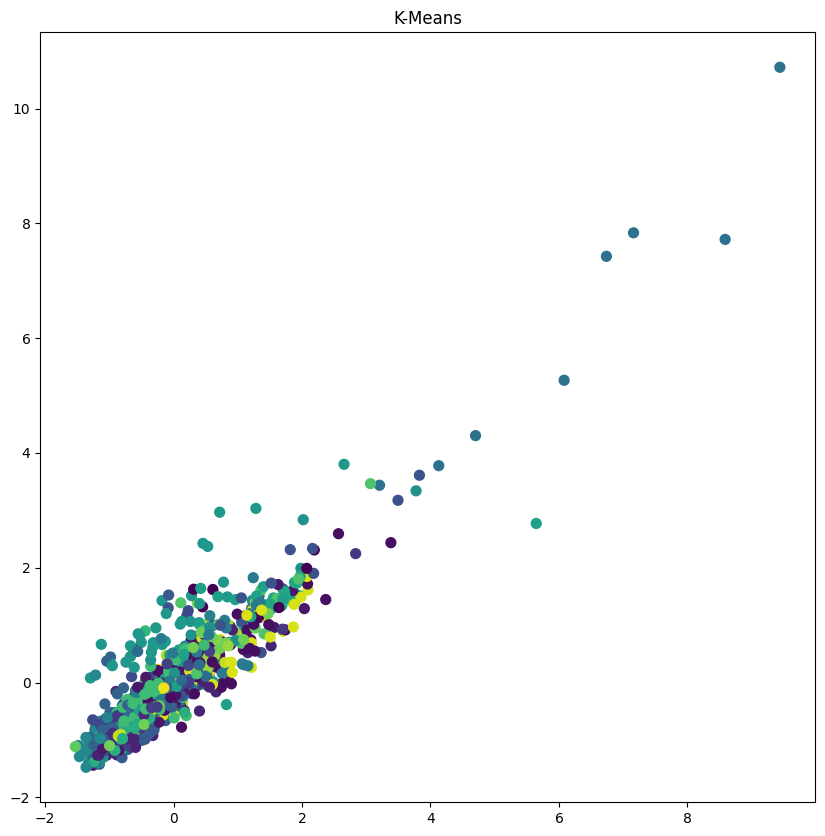

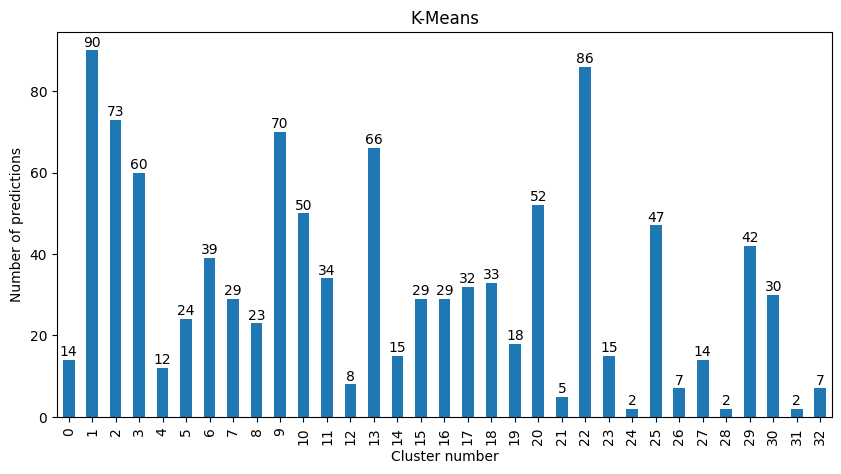

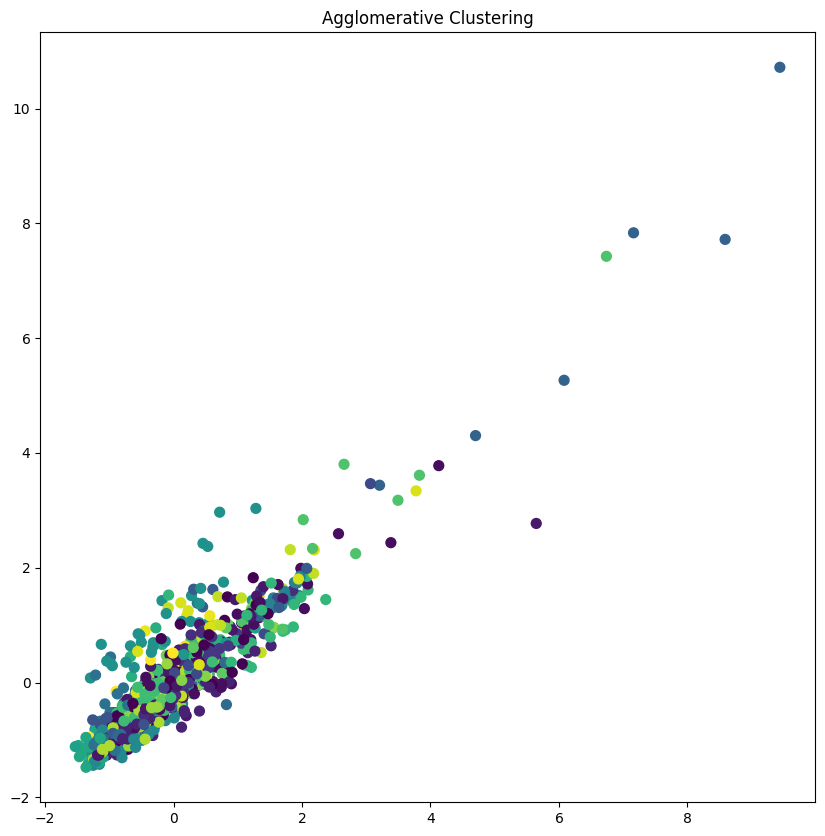

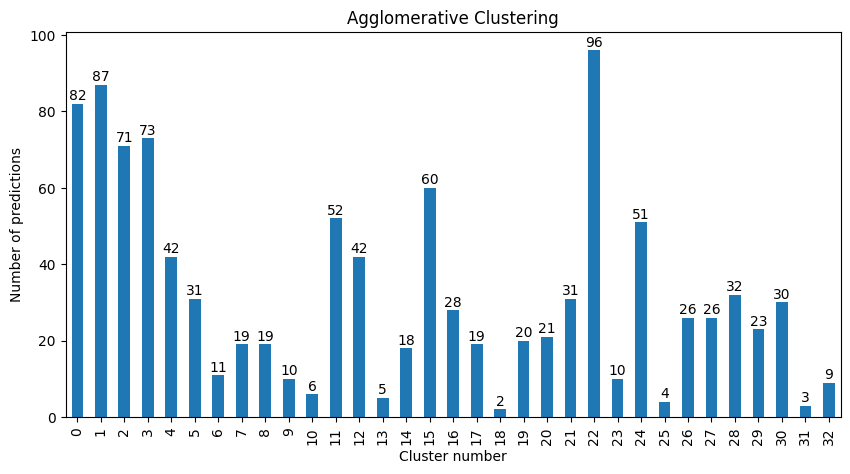

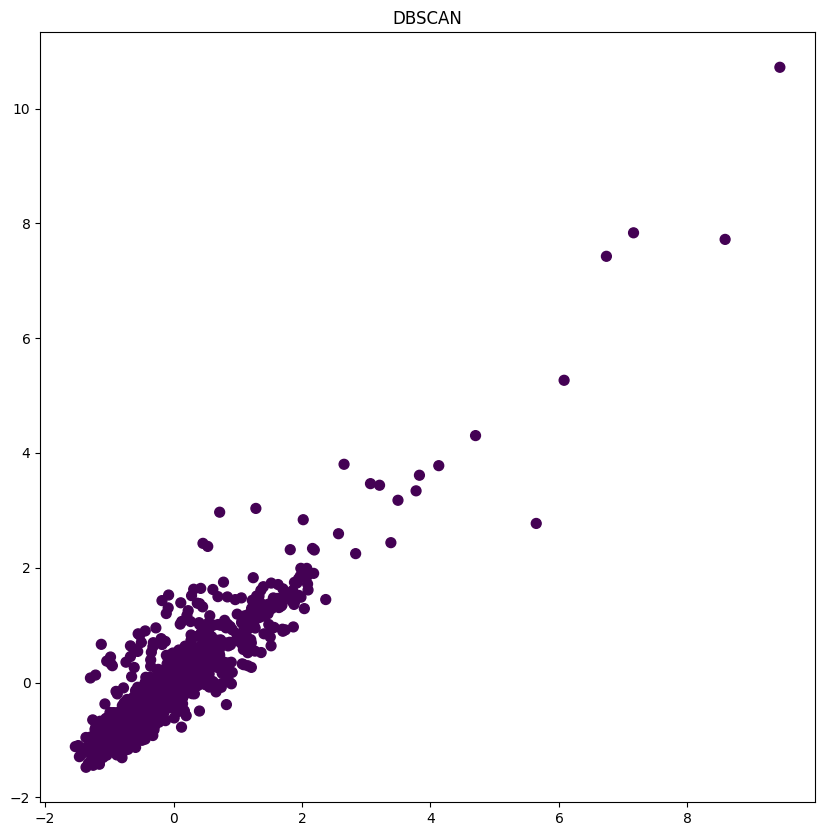

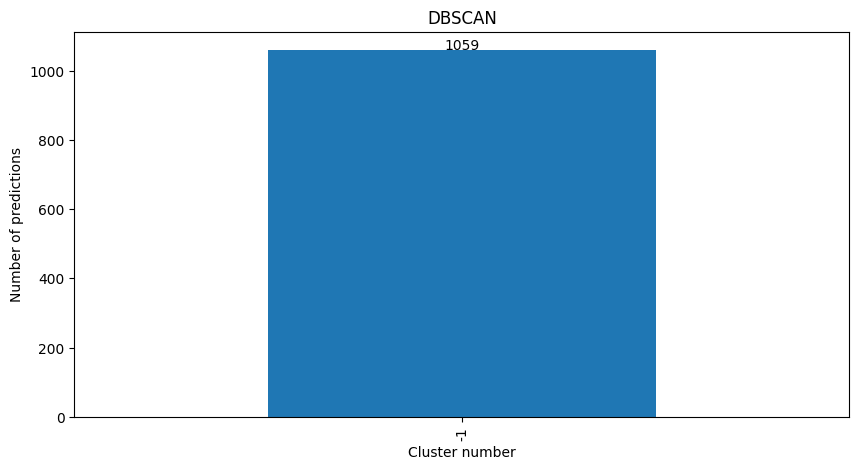

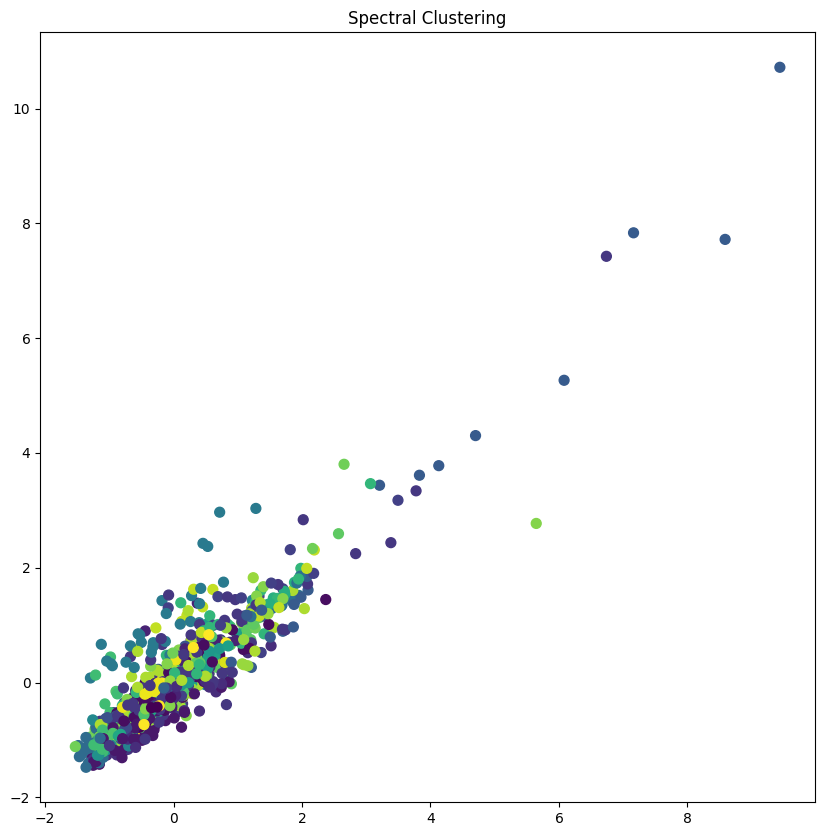

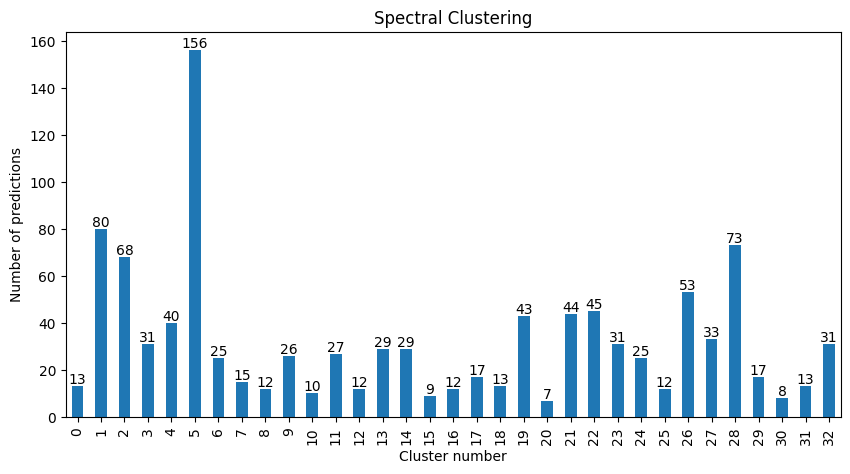

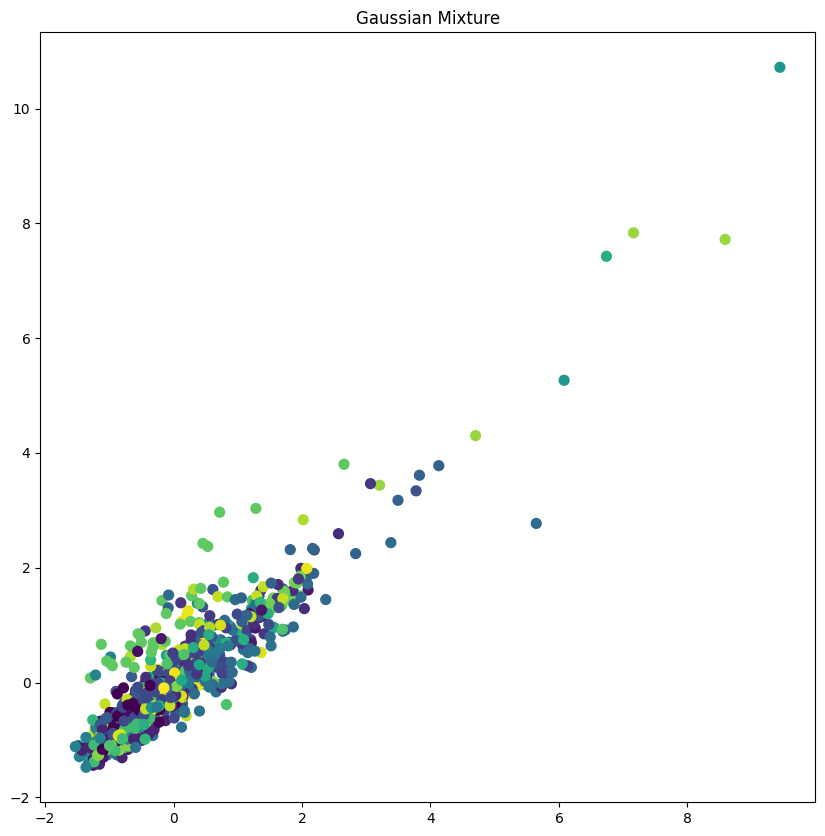

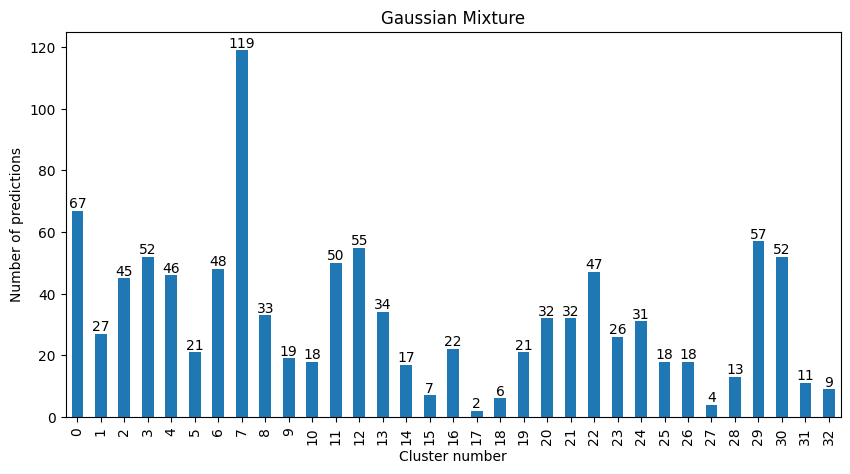

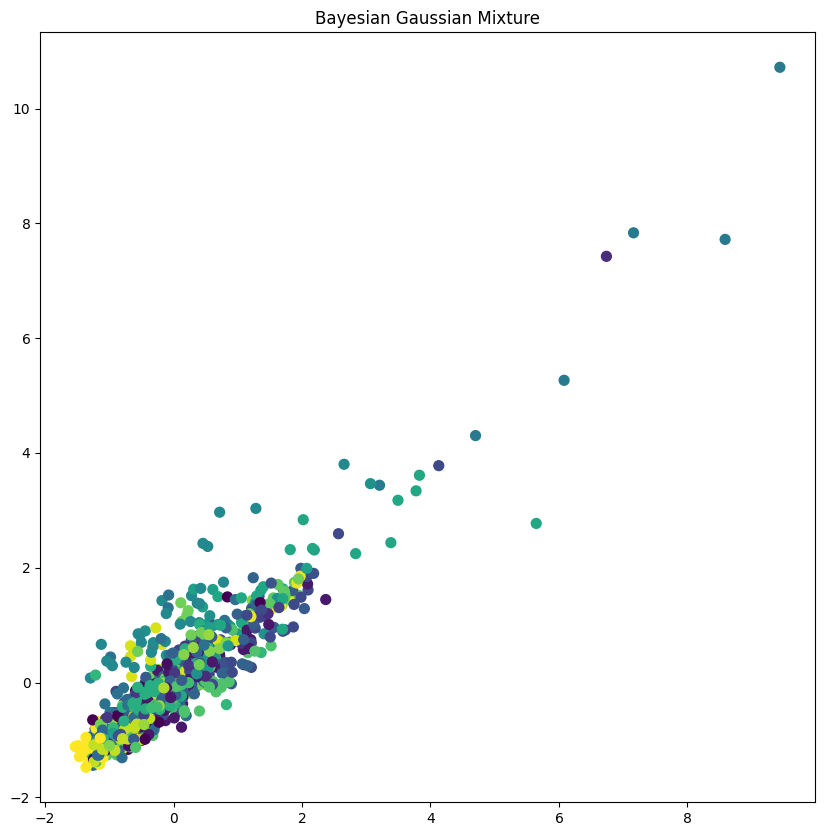

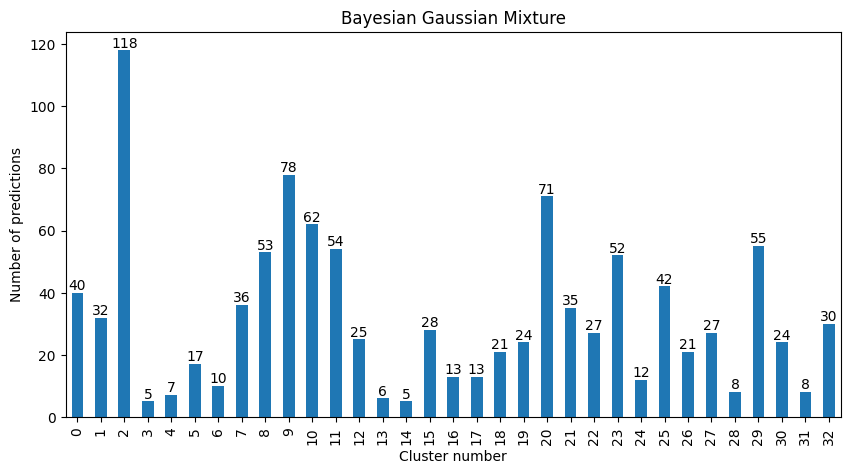

In [239]:
for name, model_dict in clusters.items():
    visualize_cluster(X, model_dict['predictions'], name)

#### DBSCAN (Gürültülü Uygulamalar İçin Yoğunluğa Dayalı Uzaysal Kümeleme) Algoritması Hakkında

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algoritması, yoğunluk tabanlı bir algoritmadır. Bu algoritma, veri noktalarını yoğunluklarına göre kümelere ayırır. DBSCAN, belirli bir mesafedeki (Eps parametresi olarak adlandırılan) komşu noktalarının yüksek sayısına sahip "çekirdek noktaları" belirleyerek başlar ve sonra kümeyi, çekirdek noktalarından erişilebilen tüm noktaları da içerecek şekilde genişletir. DBSCAN, yoğunluk tabanlı bir algoritma olduğu için, kümeleme algoritmaları arasında en esnek olanıdır. DBSCAN, küresel olmayan veya açıkça ayrılmış olan veriyi modellemek için özellikle yararlıdır. DBSCAN, veri kümesindeki gürültüyü ayıklamak için de kullanılabilir.

Bu ödev için kulanılan dataseti için DBSCAN algoritması başarısız olmuştur. Bu yüzden bu algoritma ile ilgili detaylı bir inceleme yapılmamıştır.

#### HierarchicalClustering

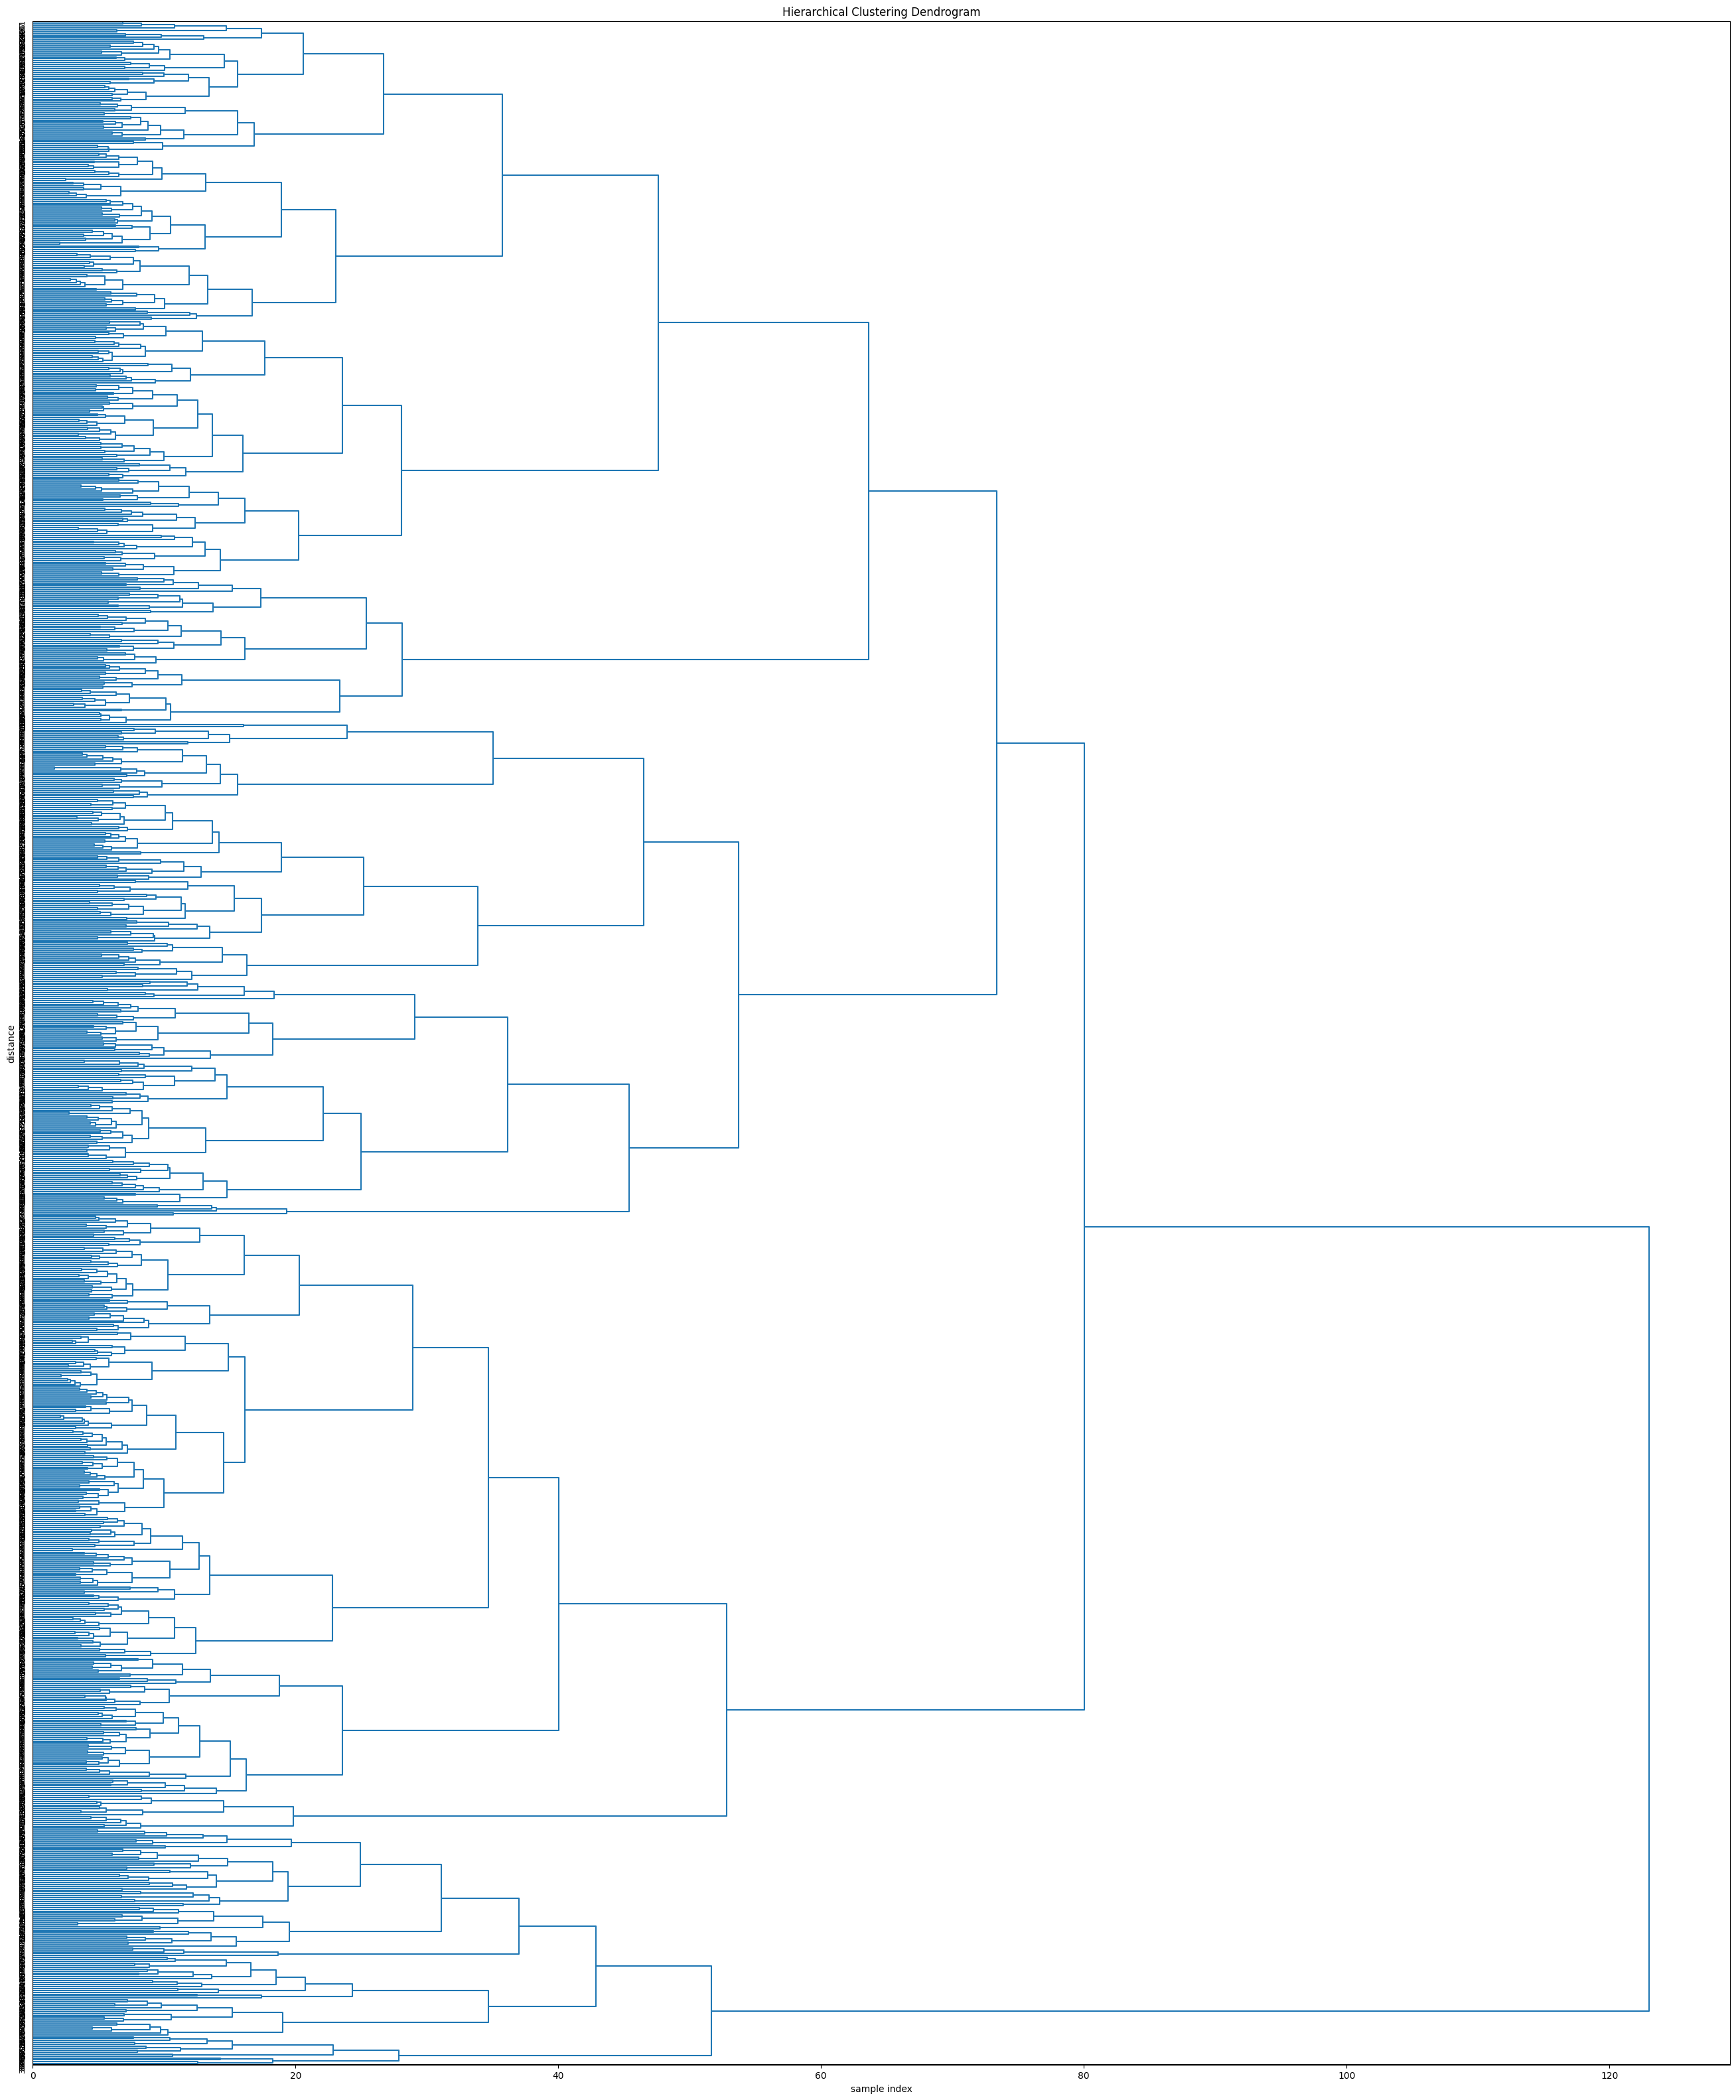

In [261]:
def hierarchical_clustering(X, n_clusters, distance_threshold, orientation = 'top'):
    Z = linkage(X, 'ward')
    plt.figure(figsize = (n_clusters, 40))
    
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8., color_threshold = distance_threshold, orientation = orientation)
    plt.axhline(y = distance_threshold, c = 'k')
    plt.show()
    hierarchical_clusters = fcluster(Z, n_clusters, criterion = 'maxclust')
    return hierarchical_clusters

hierarchical_clusters = hierarchical_clustering(X, 33, 0.5, 'right')

In [262]:
fig = go.Figure(data = [go.Scatter3d(x = X.iloc[:, 35], y = X.iloc[:, 52], z = X.iloc[:, 55], mode = 'markers', marker = dict(color = hierarchical_clusters, size = 5, opacity = 0.8))])
fig.show()

In [271]:
metrics = {}

for name, model_dict in clusters.items():
    if name == 'DBSCAN':
        continue
    metrics[name] = {'Silhouette Score': silhouette_score(X, model_dict['predictions']),
                     'Calinski Harabasz Score': calinski_harabasz_score(X, model_dict['predictions'])}

metrics = pd.DataFrame(metrics)
metrics

K-Means  Agglomerative Clustering  \
Silhouette Score          0.051278                  0.039112   
Calinski Harabasz Score  30.289962                 28.532293   

                         Spectral Clustering  Gaussian Mixture  \
Silhouette Score                    0.016819          0.045439   
Calinski Harabasz Score            25.984864         29.655944   

                         Bayesian Gaussian Mixture  
Silhouette Score                          0.047491  
Calinski Harabasz Score                  29.291007

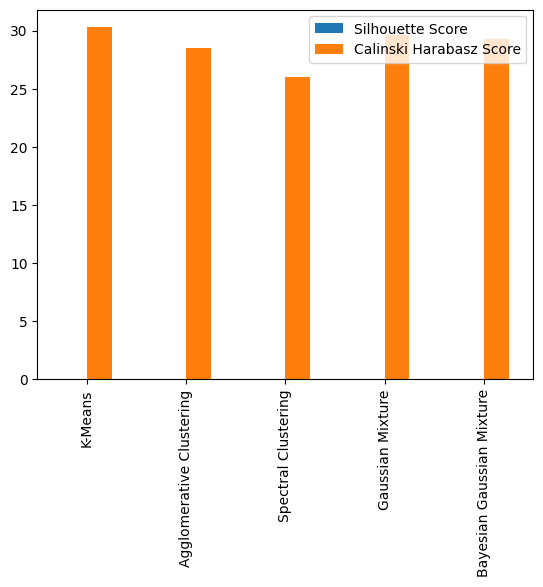

In [272]:
metrics.T.plot.bar()
plt.xticks(rotation = 90)
plt.show()

c-Kümeleme: Kümeleme yöntemlerinden en başarılı olanların araştırılması ve 3 tanesinin seçilerek detaylı incelenmesi beklenmektedir. Kümeleme sonunda değerlendirme aşamasında örneklerin sınıf etiketlerinin kullanılarak çıkan kümelerin etiketlenmesi ve kümeleme başarılarının karşılaştırılması gerekmektedir.

In [273]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

metrics = {}

for name, model_dict in clusters.items():
    if name == 'DBSCAN':
        continue
    metrics[name] = {'Adjusted Rand Score': adjusted_rand_score(y, model_dict['predictions']),
                     'Adjusted Mutual Info Score': adjusted_mutual_info_score(y, model_dict['predictions']),
                     'Homogeneity Score': homogeneity_score(y, model_dict['predictions']),
                     'Completeness Score': completeness_score(y, model_dict['predictions']),
                     'V Measure Score': v_measure_score(y, model_dict['predictions'])}

metrics = pd.DataFrame(metrics)
metrics

K-Means  Agglomerative Clustering  \
Adjusted Rand Score         0.087325                  0.105278   
Adjusted Mutual Info Score  0.223559                  0.233733   
Homogeneity Score           0.323507                  0.332513   
Completeness Score          0.344189                  0.354798   
V Measure Score             0.333528                  0.343294   

                            Spectral Clustering  Gaussian Mixture  \
Adjusted Rand Score                    0.076760          0.080552   
Adjusted Mutual Info Score             0.243354          0.206754   
Homogeneity Score                      0.344488          0.316802   
Completeness Score                     0.368736          0.331071   
V Measure Score                        0.356200          0.323779   

                            Bayesian Gaussian Mixture  
Adjusted Rand Score                          0.083539  
Adjusted Mutual Info Score                   0.208854  
Homogeneity Score                            0.316788  
Completeness Score                           0.332567  
V Measure Score                              0.324486

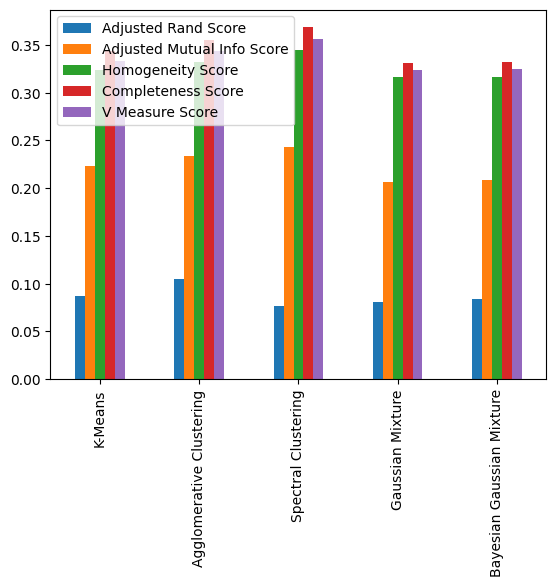

In [274]:
metrics.T.plot.bar()
plt.xticks(rotation = 90)
plt.show()